### Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

plt.rcParams['figure.figsize']=[10,8]
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor

### Import Dataset

In [4]:
df = pd.read_excel("Volve production data.xlsx")
df.head()

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.00000  ...              %    0.00000   
1            0.0                    NaN  ...              %    0.00000   
2            0.0                    NaN  ...              %    0.00000   
3            0.0                    NaN  ...              %    0.00000   
4            0.0              310.37614  ...              %   33.09788   

   AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0    0.00000        0.00000          0.0           0.0           0.0   
1    0.00000        0.00000          0.0           0.0           0.0   
2    0.00000        0.00000          0.0           0.0           0.0   
3    0.00000        0.00000          0.0           0.0           0.0   
4   10.47992       33.07195          0.0           0.0           0.0   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0          NaN  production         WI  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  

[5 rows x 24 columns]

In [5]:
df.shape

(15634, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

`Inference:`
    
- Our dataset has 15634 rows and 24 columns.
- There are missing values in the dataset.
- The datatypes are misclassified. These should be changed correctly.
- Avg_downhole_temperature is the target column.

In [7]:
df.dtypes

DATEPRD                     datetime64[ns]
WELL_BORE_CODE                      object
NPD_WELL_BORE_CODE                   int64
NPD_WELL_BORE_NAME                  object
NPD_FIELD_CODE                       int64
NPD_FIELD_NAME                      object
NPD_FACILITY_CODE                    int64
NPD_FACILITY_NAME                   object
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_CHOKE_UOM                       object
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
BORE_WI_VOL                        float64
FLOW_KIND                           object
WELL_TYPE  

In [8]:
df['FLOW_KIND'].unique()

array(['production', 'injection'], dtype=object)

In [9]:
df['WELL_TYPE'].unique()

array(['WI', 'OP'], dtype=object)

### df_production

In [10]:
df_production = df[df['FLOW_KIND'] == 'production']

In [11]:
df_production.head()

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.00000  ...              %    0.00000   
1            0.0                    NaN  ...              %    0.00000   
2            0.0                    NaN  ...              %    0.00000   
3            0.0                    NaN  ...              %    0.00000   
4            0.0              310.37614  ...              %   33.09788   

   AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0    0.00000        0.00000          0.0           0.0           0.0   
1    0.00000        0.00000          0.0           0.0           0.0   
2    0.00000        0.00000          0.0           0.0           0.0   
3    0.00000        0.00000          0.0           0.0           0.0   
4   10.47992       33.07195          0.0           0.0           0.0   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0          NaN  production         WI  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  

[5 rows x 24 columns]

In [12]:
df_production.shape

(9161, 24)

In [13]:
df_production['WELL_TYPE'].unique()

array(['WI', 'OP'], dtype=object)

In [14]:
df_production['NPD_WELL_BORE_NAME'].unique()

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D',
       '15/9-F-5'], dtype=object)

In [15]:
df_production.sort_values(by='DATEPRD', ascending = True, inplace = True)

In [16]:
df_production['DATEPRD']

4967    2008-02-12
1911    2008-02-12
4968    2008-02-13
1912    2008-02-13
1913    2008-02-14
           ...    
4966    2016-09-17
8022    2016-09-17
1910    2016-09-17
9000    2016-09-17
15632   2016-09-17
Name: DATEPRD, Length: 9161, dtype: datetime64[ns]

### Adding new columns (years)

In [17]:
years = df_production['DATEPRD'].apply(lambda x: x.strftime ("%Y"))

In [18]:
df_production.insert(0, 'Years', years)

In [19]:
df_production.head()

Years    DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
4967  2008 2008-02-12  NO 15/9-F-14 H                5351          15/9-F-14   
1911  2008 2008-02-12  NO 15/9-F-12 H                5599          15/9-F-12   
4968  2008 2008-02-13  NO 15/9-F-14 H                5351          15/9-F-14   
1912  2008 2008-02-13  NO 15/9-F-12 H                5599          15/9-F-12   
1913  2008 2008-02-14  NO 15/9-F-12 H                5599          15/9-F-12   

      NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
4967         3420717          VOLVE             369304    MÆRSK INSPIRER   
1911         3420717          VOLVE             369304    MÆRSK INSPIRER   
4968         3420717          VOLVE             369304    MÆRSK INSPIRER   
1912         3420717          VOLVE             369304    MÆRSK INSPIRER   
1913         3420717          VOLVE             369304    MÆRSK INSPIRER   

      ON_STREAM_HRS  ...  AVG_CHOKE_UOM   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
4967            0.0  ...              %    0.000000   0.000000       0.058850   
1911           11.5  ...              %  106.805939  16.294718      92.475107   
4968            0.0  ...              %    0.000000   0.000000       0.067680   
1912           24.0  ...              %  120.888576  53.374330      89.620148   
1913           22.5  ...              %  113.718175  72.737631      80.120465   

      BORE_OIL_VOL BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND  \
4967          0.00         0.00          0.00          NaN  production   
1911        284.65     38888.67        385.01          NaN  production   
4968          0.00         0.00          0.00          NaN  production   
1912       1869.70    285246.16          7.13          NaN  production   
1913       3124.09    509954.88          1.16          NaN  production   

      WELL_TYPE  
4967         OP  
1911         OP  
4968         OP  
1912         OP  
1913         OP  

[5 rows x 25 columns]

### df_production_annual

In [20]:
df_production_annual = df_production.groupby(by=['Years', 'NPD_WELL_BORE_NAME'], as_index= True)[['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']].sum()


In [21]:
df_production_annual.head()

BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL
Years NPD_WELL_BORE_NAME                                          
2008  15/9-F-12             1173446.66  1.721895e+08      22526.83
      15/9-F-14              590928.49  8.484905e+07        982.11
2009  15/9-F-12             1522540.54  2.130051e+08      53370.56
      15/9-F-14             1161851.50  1.629769e+08     178733.18
2010  15/9-F-12              873827.95  1.256990e+08     905532.20

### CUM columns of BORE_OIL, GAS and WAT

In [22]:
df_production.loc[:, 'BORE_OIL_CUM'] = df_production.loc[:, 'BORE_OIL_VOL'].cumsum()
df_production.loc[:, 'BORE_GAS_CUM'] = df_production.loc[:, 'BORE_GAS_VOL'].cumsum()
df_production.loc[:, 'BORE_WAT_CUM'] = df_production.loc[:, 'BORE_WAT_VOL'].cumsum()

In [23]:
df_production['BORE_OIL_CUM']

4967            0.00
1911          284.65
4968          284.65
1912         2154.35
1913         5278.44
            ...     
4966     10036900.57
8022     10036900.57
1910     10037080.61
9000     10037080.61
15632    10037080.61
Name: BORE_OIL_CUM, Length: 9161, dtype: float64

### Total CUMMULATIVE Production

In [24]:
df_production.loc[:, 'TOTAL_CUM_PRO'] = df_production.loc[:, 'BORE_OIL_CUM'] + df_production.loc[:, 'BORE_GAS_CUM'] + df_production.loc[:, 'BORE_WAT_CUM']

df_production.head()

Years    DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
4967  2008 2008-02-12  NO 15/9-F-14 H                5351          15/9-F-14   
1911  2008 2008-02-12  NO 15/9-F-12 H                5599          15/9-F-12   
4968  2008 2008-02-13  NO 15/9-F-14 H                5351          15/9-F-14   
1912  2008 2008-02-13  NO 15/9-F-12 H                5599          15/9-F-12   
1913  2008 2008-02-14  NO 15/9-F-12 H                5599          15/9-F-12   

      NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
4967         3420717          VOLVE             369304    MÆRSK INSPIRER   
1911         3420717          VOLVE             369304    MÆRSK INSPIRER   
4968         3420717          VOLVE             369304    MÆRSK INSPIRER   
1912         3420717          VOLVE             369304    MÆRSK INSPIRER   
1913         3420717          VOLVE             369304    MÆRSK INSPIRER   

      ON_STREAM_HRS  ...  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
4967            0.0  ...          0.00          0.00          0.00   
1911           11.5  ...        284.65      38888.67        385.01   
4968            0.0  ...          0.00          0.00          0.00   
1912           24.0  ...       1869.70     285246.16          7.13   
1913           22.5  ...       3124.09     509954.88          1.16   

      BORE_WI_VOL   FLOW_KIND WELL_TYPE  BORE_OIL_CUM  BORE_GAS_CUM  \
4967          NaN  production        OP          0.00          0.00   
1911          NaN  production        OP        284.65      38888.67   
4968          NaN  production        OP        284.65      38888.67   
1912          NaN  production        OP       2154.35     324134.83   
1913          NaN  production        OP       5278.44     834089.71   

      BORE_WAT_CUM  TOTAL_CUM_PRO  
4967          0.00           0.00  
1911        385.01       39558.33  
4968        385.01       39558.33  
1912        392.14      326681.32  
1913        393.30      839761.45  

[5 rows x 29 columns]

In [25]:
df_production['TOTAL_CUM_PRO']

4967     0.000000e+00
1911     3.955833e+04
4968     3.955833e+04
1912     3.266813e+05
1913     8.397614e+05
             ...     
4966     1.500693e+09
8022     1.500693e+09
1910     1.500726e+09
9000     1.500726e+09
15632    1.500726e+09
Name: TOTAL_CUM_PRO, Length: 9161, dtype: float64

### Data Visualization

In [26]:
total_oil = df_production.BORE_OIL_VOL.sum()
total_gas = df_production.BORE_GAS_VOL.sum()
total_wat = df_production.BORE_WAT_VOL.sum()

In [27]:
three_phase_prod = total_oil + total_oil + total_wat

In [28]:
print(f"Total oil produced is {total_oil} cubic meters")
print(f"Total oil produced is {total_gas} cubic meters")
print(f"Total oil produced is {total_wat} cubic meters")
print(f"The total amount produced is {round(three_phase_prod)} cubic meters, {round(three_phase_prod * 6.28981077)} barrels.")

Total oil produced is 10037080.61 cubic meters
Total oil produced is 1475370435.94 cubic meters
Total oil produced is 15318578.35 cubic meters
The total amount produced is 35392740 cubic meters, 222613635 barrels.


In [29]:
df_production.describe()

NPD_WELL_BORE_CODE  NPD_FIELD_CODE  NPD_FACILITY_CODE  ON_STREAM_HRS  \
count         9161.000000          9161.0             9161.0    9161.000000   
mean          6034.808645       3420717.0           369304.0      20.168721   
std            824.532027             0.0                0.0       8.293401   
min           5351.000000       3420717.0           369304.0       0.000000   
25%           5351.000000       3420717.0           369304.0      24.000000   
50%           5599.000000       3420717.0           369304.0      24.000000   
75%           7078.000000       3420717.0           369304.0      24.000000   
max           7405.000000       3420717.0           369304.0      25.000000   

       AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
count            8980.000000               8980.000000    8980.000000   
mean              181.803869                 77.162969     154.028787   
std               109.712363                 45.657948      76.752373   
min                 0.000000                  0.000000       0.000000   
25%                 0.000000                  0.000000      83.665361   
50%               232.896939                103.186689     175.588861   
75%               255.401455                106.276591     204.319964   
max               397.588550                108.502178     345.906770   

       AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  \
count        7890.000000       8919.000000  9155.000000  9146.000000   
mean           14.856100         55.168533    45.377811    67.728440   
std             8.406822         36.692924    24.752631    27.719028   
min             0.000000          0.000000     0.000000     0.000000   
25%            10.841437         18.952989    31.148062    56.577834   
50%            16.308598         52.096877    37.933620    80.071250   
75%            21.306125         99.924288    57.101268    88.062202   
max            30.019828        100.000000   137.311030    93.509584   

       DP_CHOKE_SIZE  BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  \
count    9155.000000   9161.000000    9161.000000   9161.000000         15.0   
mean       19.170492   1095.631548  161049.059703   1672.151332          0.0   
std        22.580005   1323.538151  188136.410434   1706.982853          0.0   
min         0.000000      0.000000       0.000000   -457.840000          0.0   
25%         3.356379    190.690000   29430.590000     19.870000          0.0   
50%         9.566033    557.550000   87749.660000   1097.790000          0.0   
75%        26.967948   1345.200000  202482.300000   3260.950000          0.0   
max       125.718570   5901.840000  851131.520000   8019.740000          0.0   

       BORE_OIL_CUM  BORE_GAS_CUM  BORE_WAT_CUM  TOTAL_CUM_PRO  
count  9.161000e+03  9.161000e+03  9.161000e+03   9.161000e+03  
mean   7.369114e+06  1.073756e+09  8.069692e+06   1.089195e+09  
std    2.641489e+06  3.897673e+08  5.239227e+06   3.972346e+08  
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00  
25%    6.461658e+06  9.266871e+08  2.897619e+06   9.360463e+08  
50%    8.269679e+06  1.207615e+09  9.544360e+06   1.225429e+09  
75%    9.319372e+06  1.364218e+09  1.257150e+07   1.386109e+09  
max    1.003708e+07  1.475370e+09  1.531858e+07   1.500726e+09

### OIL, GAS and Water Production

In [30]:
phases = ['Oil', 'Gas', 'Water']
phases_amounts = [round(total_oil), round(total_gas), round(total_wat)]

fig = px.pie(values=phases_amounts, names=phases, labels=phases, color=phases,
             color_discrete_map={'Oil':'purple', 'Gas':'green', 'Water':'yellow'},
             title="<b>Fluid Production</b>")

fig.update_traces(hovertemplate="<br>".join(["Fluid: %{label}", "Production: %{value} standard meter cube"]),
                 pull=[0.3, 0.4, 0.3],
                 textinfo='percent')

fig.update_layout(font_size=16)
fig.show()

In [31]:
# Clearly we can observe the gas production is the most.

### Annual Gas Production

In [32]:
df_production_annual

BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL
Years NPD_WELL_BORE_NAME                                          
2008  15/9-F-12             1173446.66  1.721895e+08      22526.83
      15/9-F-14              590928.49  8.484905e+07        982.11
2009  15/9-F-12             1522540.54  2.130051e+08      53370.56
      15/9-F-14             1161851.50  1.629769e+08     178733.18
2010  15/9-F-12              873827.95  1.256990e+08     905532.20
      15/9-F-14              816074.60  1.182494e+08     982062.58
2011  15/9-F-12              339718.07  5.184394e+07    1060416.00
      15/9-F-14              508247.33  7.847626e+07    1130224.28
2012  15/9-F-12              225822.36  3.602960e+07    1339752.20
      15/9-F-14              348383.97  5.417904e+07     769849.43
2013  15/9-F-11              156100.83  2.400089e+07      12774.63
      15/9-F-12              138153.50  2.245506e+07    1442132.29
      15/9-F-14              263758.20  4.113183e+07    1121458.87
2014  15/9-F-1 C             103185.40  1.522459e+07      39725.83
      15/9-F-11              362223.03  5.477720e+07      70099.54
      15/9-F-12               57998.80  8.830910e+06    1404952.69
      15/9-F-14              151564.46  2.274536e+07    1200917.21
      15/9-F-15 D             68135.80  1.021381e+07        375.65
2015  15/9-F-1 C              62235.27  9.251266e+06     119742.53
      15/9-F-11              465817.60  6.935326e+07     382001.45
      15/9-F-12              200201.18  2.983737e+07     341147.48
      15/9-F-14               78395.71  1.172238e+07    1147773.53
      15/9-F-15 D             55099.30  8.259571e+06      19160.87
2016  15/9-F-1 C              12288.66  1.965059e+06      47834.03
      15/9-F-11              163707.64  2.617917e+07     625930.65
      15/9-F-12               47900.49  7.651741e+06     263490.12
      15/9-F-14               23029.13  3.679357e+06     589248.55
      15/9-F-15 D             25283.46  4.031973e+06      32829.88
      15/9-F-5                41160.68  6.561826e+06      13533.18

In [33]:
annual_total_gas = df_production_annual.groupby(by=['Years'])[['BORE_GAS_VOL']].sum()

In [34]:
annual_total_gas

BORE_GAS_VOL
Years              
2008   2.570386e+08
2009   3.759820e+08
2010   2.439484e+08
2011   1.303202e+08
2012   9.020864e+07
2013   8.758778e+07
2014   1.117919e+08
2015   1.284238e+08
2016   5.006913e+07

In [35]:
import pandas as pd
import plotly.graph_objects as go

# Example DataFrame creation (this should be replaced by your actual DataFrame)
# annual_volve_production = pd.DataFrame({
#     'Years': [2010, 2011, 2012, 2013, 2014],
#     'BORE_OIL_VOL': [100, 150, 200, 250, 300]
# }).groupby('Years').sum()

# Summarize annual oil volume
annual_gas_total = df_production_annual.groupby(by=["Years"])[["BORE_GAS_VOL"]].sum()

# Create layout for the plot
layout = go.Layout(
    title='<b>Annual Gas Production</b>',
    xaxis_title='Year',
    yaxis_title='Gas Production (m³)',
    height=500,
    width=900,
    font=dict(size=12)
)

# Create the figure with the specified layout
figure = go.Figure(layout=layout)

# Add bar trace for oil production
figure.add_trace(go.Bar(
    x=annual_gas_total.index,
    y=annual_gas_total["BORE_GAS_VOL"],
    marker=dict(color='limegreen', line=dict(color='white', width=1.2)),
    opacity=0.8,
    hovertemplate='<br>'.join(['Year = %{x}', 'Oil = %{y}']),
    name='Production'
))

# Add scatter trace for highlighting peaks or trends
figure.add_trace(go.Scatter(
    x=annual_gas_total.index,
    y=annual_gas_total["BORE_GAS_VOL"],
    line=dict(dash='dash', color='red', width=3),
    mode='lines+markers',
    marker=dict(size=10),
    hovertemplate='<br>'.join(['Year = %{x}', 'Oil = %{y}']),
    name='Peaks'
))

# Show the figure
figure.show()

`Inference:`
    
- This graph provides an overview about the annul gas production.
- In 2009, there was the highest gas production.
- Since 2009, there was decrease in the gas production.
- In 2015, these was a slight peak but still again it went down.

In [36]:
import pandas as pd
import plotly.graph_objects as go

annual_oil_total = df_production_annual.groupby(by=["Years"])[["BORE_OIL_VOL"]].sum()

# Create layout for the plot
layout = go.Layout(
    title='<b>Annual Oil Production</b>',
    xaxis_title='Year',
    yaxis_title='Oil Production (m³)',
    height=500,
    width=900,
    font=dict(size=12)
)

# Create the figure with the specified layout
figure = go.Figure(layout=layout)

# Add bar trace for oil production
figure.add_trace(go.Bar(
    x=annual_oil_total.index,
    y=annual_oil_total["BORE_OIL_VOL"],
    marker=dict(color='limegreen', line=dict(color='white', width=1.2)),
    opacity=0.8,
    hovertemplate='<br>'.join(['Year = %{x}', 'Oil = %{y}']),
    name='Production'
))

# Add scatter trace for highlighting peaks or trends
figure.add_trace(go.Scatter(
    x=annual_oil_total.index,
    y=annual_oil_total["BORE_OIL_VOL"],
    line=dict(dash='dash', color='red', width=3),
    mode='lines+markers',
    marker=dict(size=10),
    hovertemplate='<br>'.join(['Year = %{x}', 'Oil = %{y}']),
    name='Peaks'
))

# Show the figure
figure.show()

In [37]:
# Similar as the gas production.

In [38]:
df_production_annual

BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL
Years NPD_WELL_BORE_NAME                                          
2008  15/9-F-12             1173446.66  1.721895e+08      22526.83
      15/9-F-14              590928.49  8.484905e+07        982.11
2009  15/9-F-12             1522540.54  2.130051e+08      53370.56
      15/9-F-14             1161851.50  1.629769e+08     178733.18
2010  15/9-F-12              873827.95  1.256990e+08     905532.20
      15/9-F-14              816074.60  1.182494e+08     982062.58
2011  15/9-F-12              339718.07  5.184394e+07    1060416.00
      15/9-F-14              508247.33  7.847626e+07    1130224.28
2012  15/9-F-12              225822.36  3.602960e+07    1339752.20
      15/9-F-14              348383.97  5.417904e+07     769849.43
2013  15/9-F-11              156100.83  2.400089e+07      12774.63
      15/9-F-12              138153.50  2.245506e+07    1442132.29
      15/9-F-14              263758.20  4.113183e+07    1121458.87
2014  15/9-F-1 C             103185.40  1.522459e+07      39725.83
      15/9-F-11              362223.03  5.477720e+07      70099.54
      15/9-F-12               57998.80  8.830910e+06    1404952.69
      15/9-F-14              151564.46  2.274536e+07    1200917.21
      15/9-F-15 D             68135.80  1.021381e+07        375.65
2015  15/9-F-1 C              62235.27  9.251266e+06     119742.53
      15/9-F-11              465817.60  6.935326e+07     382001.45
      15/9-F-12              200201.18  2.983737e+07     341147.48
      15/9-F-14               78395.71  1.172238e+07    1147773.53
      15/9-F-15 D             55099.30  8.259571e+06      19160.87
2016  15/9-F-1 C              12288.66  1.965059e+06      47834.03
      15/9-F-11              163707.64  2.617917e+07     625930.65
      15/9-F-12               47900.49  7.651741e+06     263490.12
      15/9-F-14               23029.13  3.679357e+06     589248.55
      15/9-F-15 D             25283.46  4.031973e+06      32829.88
      15/9-F-5                41160.68  6.561826e+06      13533.18

In [39]:
from plotly.subplots import make_subplots

#Creating subplots to compare more precisely,
fig = make_subplots(rows=1, cols=2, subplot_titles=("Oil vs Water Production Regimes", "Gas vs Water Production Regimes"), x_title='<b>Years</b>',
                   y_title='<b>Production (Cubic Meters)</b>')

#To be able to get proper plot, we have change and sort index only by Years.
annual_water_total = df_production.groupby(by=["Years"])[["BORE_WAT_VOL"]].sum()

fig.add_trace(go.Scatter(x=annual_oil_total.index, y=annual_oil_total.BORE_OIL_VOL,
                               line=dict(color='limegreen', width=3),
                               marker_size=10,
                               name='Oil'),
             row=1, col=1)

fig.add_trace(go.Scatter(x=annual_water_total.index, y=annual_water_total.BORE_WAT_VOL,
                               line=dict(dash='dash', color='deepskyblue', width=3),
                               marker_size=10,
                               name='Water'),
             row=1, col=1)

fig.add_trace(go.Scatter(x=annual_gas_total.index, y=(annual_gas_total.BORE_GAS_VOL),
                               line=dict(color='indianred', width=3),
                               marker_size=10,
                               name='Gas'),
             row=1, col=2)

fig.add_trace(go.Scatter(x=annual_water_total.index, y=annual_water_total.BORE_WAT_VOL,
                               line=dict(dash='dash', color='deepskyblue', width=3),
                               marker_size=10,
                               name='Water'),
             row=1, col=2)

fig.show()

`Inference:`

- There was a significant event or change in production strategy around 2009 that caused both oil and gas production to peak that year. This could be due to a discovery of new reserves, changes in market demand, technological advancements, or a combination of these.
- The steady decline in oil and gas production after the peak year suggests that the factors contributing to the peak may have been temporary or that the production capabilities were diminishing.
- The relative stability of water production in the gas graph could indicate that water is a byproduct of gas production and not significantly affected by the factors influencing gas production.
- The decline in production of oil and gas in the later years could indicate depleting resources, regulatory or environmental constraints, or a shift towards alternative energy sources.
- Since water production is relatively stable in the "Gas vs Water" graph and shows a gradual increase in the "Oil vs Water" graph, it suggests different relationships between water production and the two hydrocarbons, possibly indicating different production processes or reservoir characteristics.

### Missing Values

In [40]:
df_production.isnull().sum()

Years                          0
DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE        181
AVG_DOWNHOLE_TEMPERATURE     181
AVG_DP_TUBING                181
AVG_ANNULUS_PRESS           1271
AVG_CHOKE_SIZE_P             242
AVG_CHOKE_UOM                  0
AVG_WHP_P                      6
AVG_WHT_P                     15
DP_CHOKE_SIZE                  6
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 9146
FLOW_KIND                      0
WELL_TYPE                      0
BORE_OIL_CUM                   0
BORE_GAS_CUM                   0
BORE_WAT_CUM                   0
TOTAL_CUM_PRO                  0
dtype: int64

In [41]:
((df_production.isnull().sum())/df_production.shape[0])*100

Years                        0.000000
DATEPRD                      0.000000
WELL_BORE_CODE               0.000000
NPD_WELL_BORE_CODE           0.000000
NPD_WELL_BORE_NAME           0.000000
NPD_FIELD_CODE               0.000000
NPD_FIELD_NAME               0.000000
NPD_FACILITY_CODE            0.000000
NPD_FACILITY_NAME            0.000000
ON_STREAM_HRS                0.000000
AVG_DOWNHOLE_PRESSURE        1.975767
AVG_DOWNHOLE_TEMPERATURE     1.975767
AVG_DP_TUBING                1.975767
AVG_ANNULUS_PRESS           13.874031
AVG_CHOKE_SIZE_P             2.641633
AVG_CHOKE_UOM                0.000000
AVG_WHP_P                    0.065495
AVG_WHT_P                    0.163738
DP_CHOKE_SIZE                0.065495
BORE_OIL_VOL                 0.000000
BORE_GAS_VOL                 0.000000
BORE_WAT_VOL                 0.000000
BORE_WI_VOL                 99.836262
FLOW_KIND                    0.000000
WELL_TYPE                    0.000000
BORE_OIL_CUM                 0.000000
BORE_GAS_CUM

### Data Imputation

In [42]:
df_production.columns

Index(['Years', 'DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE',
       'NPD_WELL_BORE_NAME', 'NPD_FIELD_CODE', 'NPD_FIELD_NAME',
       'NPD_FACILITY_CODE', 'NPD_FACILITY_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL', 'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE', 'BORE_OIL_CUM',
       'BORE_GAS_CUM', 'BORE_WAT_CUM', 'TOTAL_CUM_PRO'],
      dtype='object')

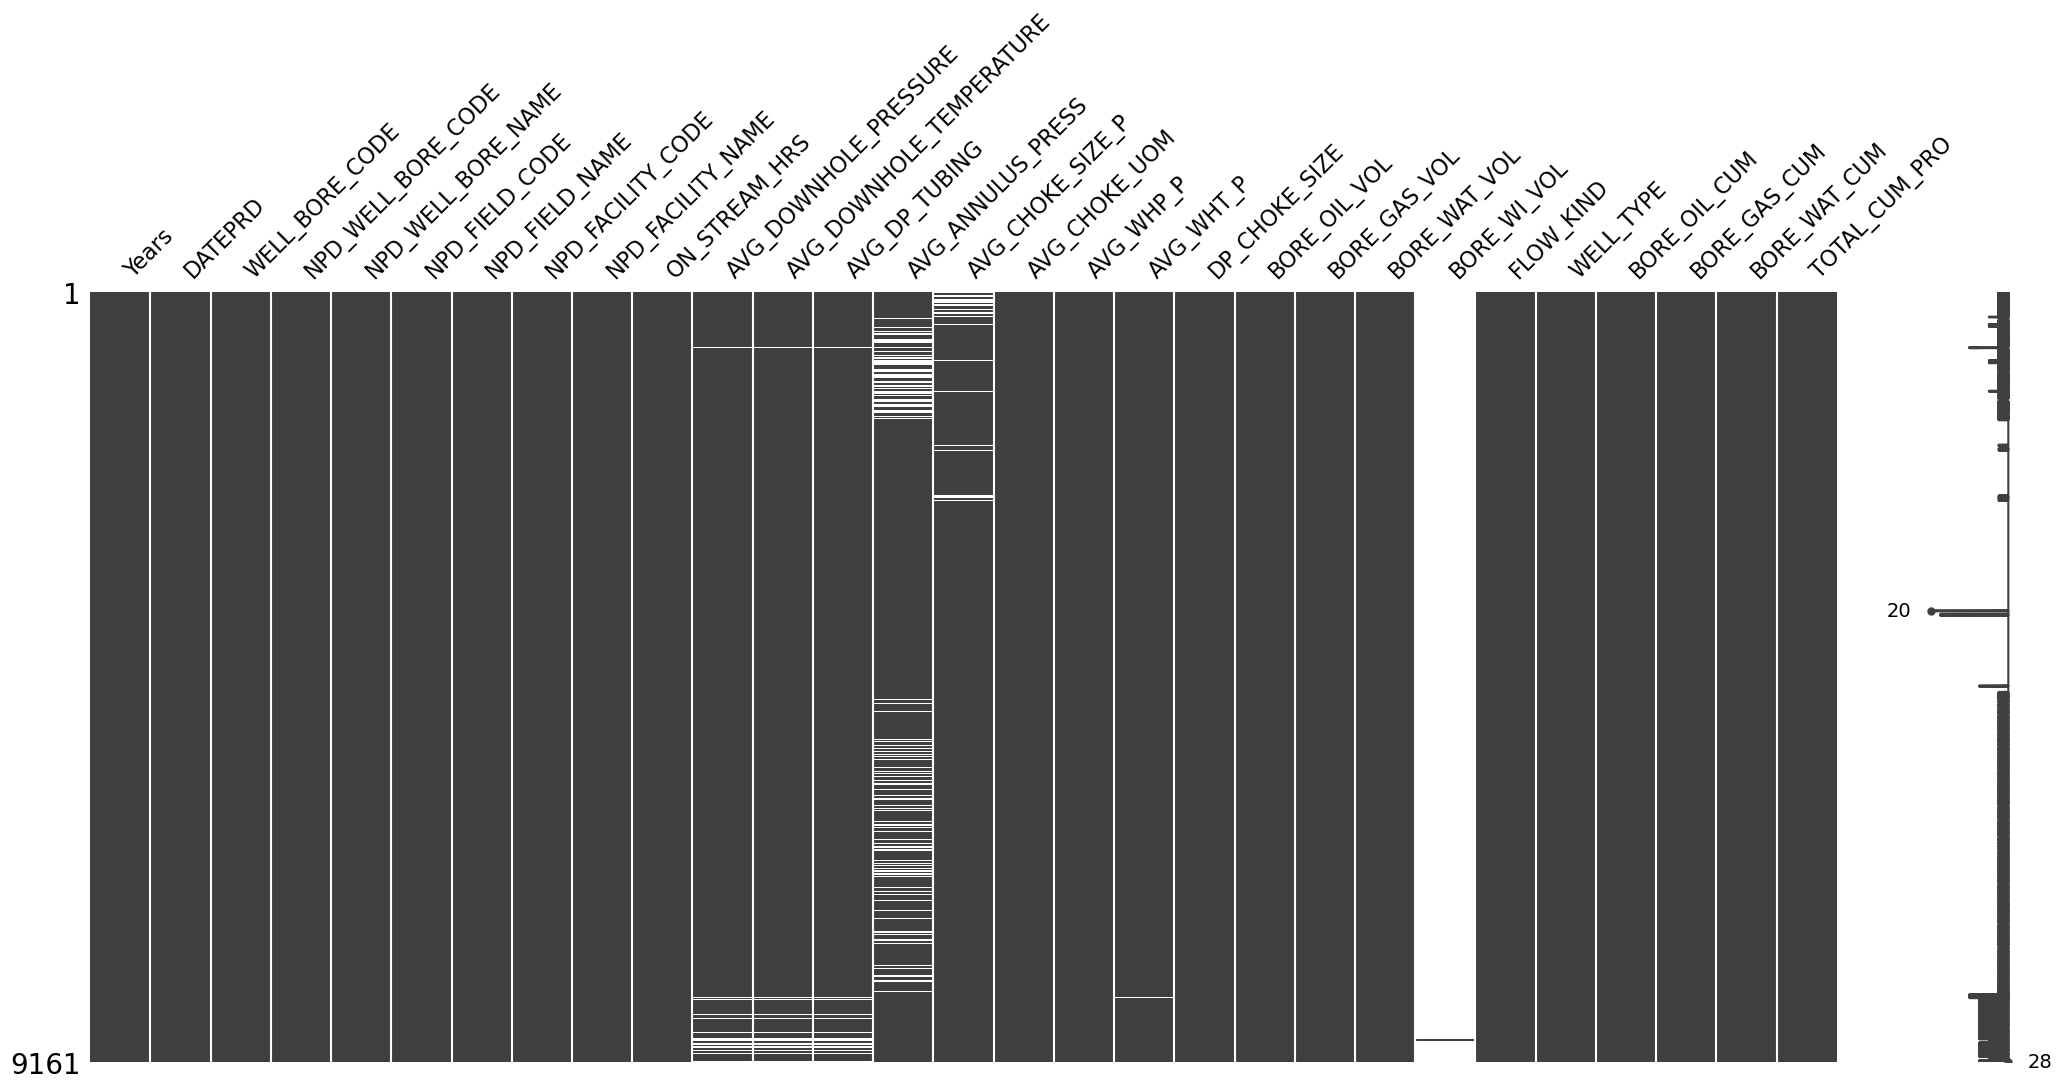

In [43]:
import missingno as msno
msno.matrix(df_production)
plt.show()

### Handling Missing Values

In [44]:
df.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [45]:
df = df.dropna(subset=['AVG_DOWNHOLE_TEMPERATURE'])

In [46]:
df.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          0
AVG_DOWNHOLE_TEMPERATURE       0
AVG_DP_TUBING                  0
AVG_ANNULUS_PRESS           1259
AVG_CHOKE_SIZE_P             240
AVG_CHOKE_UOM                  0
AVG_WHP_P                      0
AVG_WHT_P                      0
DP_CHOKE_SIZE                  0
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 8980
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [47]:
df = df.drop(columns=['BORE_WI_VOL'])

In [48]:
df.isnull().sum()/df.shape[0]

DATEPRD                     0.000000
WELL_BORE_CODE              0.000000
NPD_WELL_BORE_CODE          0.000000
NPD_WELL_BORE_NAME          0.000000
NPD_FIELD_CODE              0.000000
NPD_FIELD_NAME              0.000000
NPD_FACILITY_CODE           0.000000
NPD_FACILITY_NAME           0.000000
ON_STREAM_HRS               0.000000
AVG_DOWNHOLE_PRESSURE       0.000000
AVG_DOWNHOLE_TEMPERATURE    0.000000
AVG_DP_TUBING               0.000000
AVG_ANNULUS_PRESS           0.140200
AVG_CHOKE_SIZE_P            0.026726
AVG_CHOKE_UOM               0.000000
AVG_WHP_P                   0.000000
AVG_WHT_P                   0.000000
DP_CHOKE_SIZE               0.000000
BORE_OIL_VOL                0.000000
BORE_GAS_VOL                0.000000
BORE_WAT_VOL                0.000000
FLOW_KIND                   0.000000
WELL_TYPE                   0.000000
dtype: float64

In [49]:
df_production = df_production.dropna(subset=['AVG_DOWNHOLE_TEMPERATURE'])

In [50]:
df_production.isnull().sum()

Years                          0
DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          0
AVG_DOWNHOLE_TEMPERATURE       0
AVG_DP_TUBING                  0
AVG_ANNULUS_PRESS           1259
AVG_CHOKE_SIZE_P             240
AVG_CHOKE_UOM                  0
AVG_WHP_P                      0
AVG_WHT_P                      0
DP_CHOKE_SIZE                  0
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 8980
FLOW_KIND                      0
WELL_TYPE                      0
BORE_OIL_CUM                   0
BORE_GAS_CUM                   0
BORE_WAT_CUM                   0
TOTAL_CUM_PRO                  0
dtype: int64

In [51]:
df_production = df_production.drop(columns=['BORE_WI_VOL'])

In [52]:
df_production.isnull().sum()

Years                          0
DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          0
AVG_DOWNHOLE_TEMPERATURE       0
AVG_DP_TUBING                  0
AVG_ANNULUS_PRESS           1259
AVG_CHOKE_SIZE_P             240
AVG_CHOKE_UOM                  0
AVG_WHP_P                      0
AVG_WHT_P                      0
DP_CHOKE_SIZE                  0
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
FLOW_KIND                      0
WELL_TYPE                      0
BORE_OIL_CUM                   0
BORE_GAS_CUM                   0
BORE_WAT_CUM                   0
TOTAL_CUM_PRO                  0
dtype: int64

In [53]:
df_production_annual.isnull().sum()

BORE_OIL_VOL    0
BORE_GAS_VOL    0
BORE_WAT_VOL    0
dtype: int64

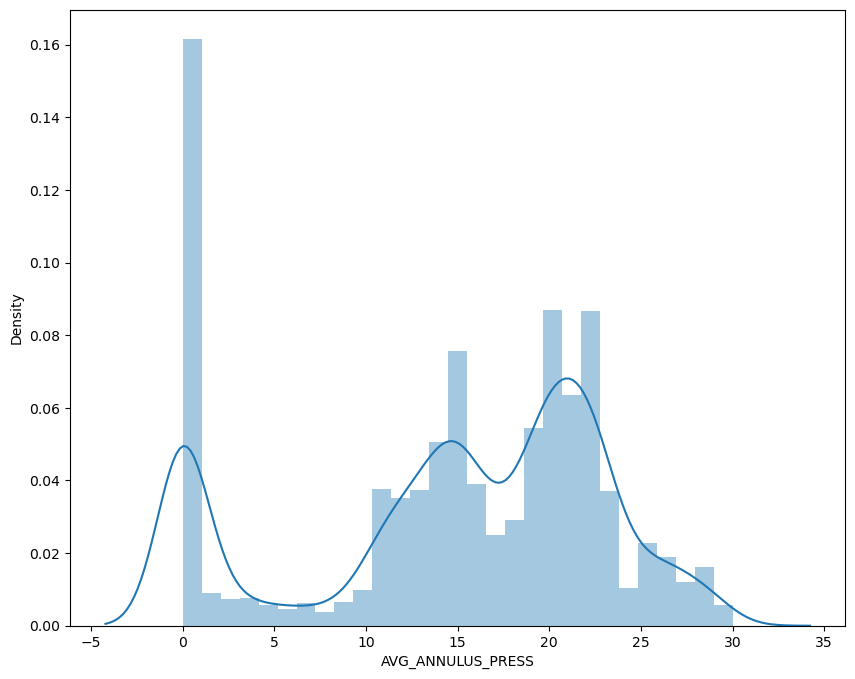

In [54]:
sns.distplot(df['AVG_ANNULUS_PRESS'])
plt.show()

### SimpleImputer

In [55]:
from sklearn.impute import SimpleImputer

In [56]:
imputer = SimpleImputer(strategy='median')  # Replace 'mean' with 'median', 'most_frequent' or 'constant'
df['AVG_ANNULUS_PRESS'] = imputer.fit_transform(df[['AVG_ANNULUS_PRESS']])

In [57]:
imputer = SimpleImputer(strategy='median')  # Replace 'mean' with 'median', 'most_frequent' or 'constant'
df['AVG_CHOKE_SIZE_P'] = imputer.fit_transform(df[['AVG_CHOKE_SIZE_P']])

In [58]:
df.isnull().sum()

DATEPRD                     0
WELL_BORE_CODE              0
NPD_WELL_BORE_CODE          0
NPD_WELL_BORE_NAME          0
NPD_FIELD_CODE              0
NPD_FIELD_NAME              0
NPD_FACILITY_CODE           0
NPD_FACILITY_NAME           0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_CHOKE_UOM               0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
FLOW_KIND                   0
WELL_TYPE                   0
dtype: int64

In [59]:
imputer = SimpleImputer(strategy='median')  # Replace 'mean' with 'median', 'most_frequent' or 'constant'
df_production['AVG_ANNULUS_PRESS'] = imputer.fit_transform(df_production[['AVG_ANNULUS_PRESS']])

In [60]:
imputer = SimpleImputer(strategy='median')  # Replace 'mean' with 'median', 'most_frequent' or 'constant'
df_production['AVG_CHOKE_SIZE_P'] = imputer.fit_transform(df_production[['AVG_CHOKE_SIZE_P']])

In [61]:
df_production.isnull().sum()

Years                       0
DATEPRD                     0
WELL_BORE_CODE              0
NPD_WELL_BORE_CODE          0
NPD_WELL_BORE_NAME          0
NPD_FIELD_CODE              0
NPD_FIELD_NAME              0
NPD_FACILITY_CODE           0
NPD_FACILITY_NAME           0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_CHOKE_UOM               0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
FLOW_KIND                   0
WELL_TYPE                   0
BORE_OIL_CUM                0
BORE_GAS_CUM                0
BORE_WAT_CUM                0
TOTAL_CUM_PRO               0
dtype: int64

`Inference:`
    
- There are missing values in the data.
- Infact there are missing values in the target column itself, so its better to drop them.
- After dropping the null values, there are missing values only in two columns and in one column completely null values.
- We shall drop that one column and impute the missing values in the rest other two columns.

### Dropping Irrelevant columns

In [62]:
# These columns are redundant to the dataset.

columns_to_drop = ['WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME','AVG_CHOKE_UOM']

In [63]:
df.drop(columns_to_drop, axis = 1, inplace = True)

In [64]:
df_cat = df.select_dtypes(include= 'O')
df_num = df.select_dtypes(include= np.number)

In [65]:
df.dtypes

DATEPRD                     datetime64[ns]
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
FLOW_KIND                           object
WELL_TYPE                           object
dtype: object

In [66]:
# All the datatypes are assigned perfectly.

### EDA

In [67]:
df_num = df.select_dtypes(include=[np.number])
df_num.head()

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
0            0.0                0.00000                   0.00000   
4            0.0              310.37614                  96.87589   
5            0.0              303.50078                  96.92339   
6            0.0              303.53481                  96.95885   
7            0.0              303.78228                  96.96873   

   AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  \
0        0.00000                0.0          0.000000    0.00000    0.00000   
4      277.27826                0.0          1.215987   33.09788   10.47992   
5      281.44744                0.0          3.087015   22.05334    8.70429   
6      276.03200                0.0          1.962365   27.50281    9.42315   
7      282.78676                0.0          0.000000   20.99552    8.13137   

   DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  
0        0.00000           0.0           0.0           0.0  
4       33.07195           0.0           0.0           0.0  
5       22.05334           0.0           0.0           0.0  
6       16.16326           0.0           0.0           0.0  
7       20.73712           0.0           0.0           0.0

In [68]:
df_cat = df.select_dtypes(include='O')
df_cat.head()

FLOW_KIND WELL_TYPE
0  production        WI
4  production        OP
5  production        OP
6  production        OP
7  production        OP

In [69]:
df_num.describe()

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
count    8980.000000            8980.000000               8980.000000   
mean       20.204045             181.803869                 77.162969   
std         8.257812             109.712363                 45.657948   
min         0.000000               0.000000                  0.000000   
25%        24.000000               0.000000                  0.000000   
50%        24.000000             232.896939                103.186689   
75%        24.000000             255.401455                106.276591   
max        25.000000             397.588550                108.502178   

       AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P    AVG_WHP_P  \
count    8980.000000        8980.000000       8980.000000  8980.000000   
mean      154.028787          14.989399         54.881018    45.770472   
std        76.752373           7.813703         36.196646    24.688765   
min         0.000000           0.000000          0.000000     0.000000   
25%        83.665361          12.034766         20.673132    31.420057   
50%       175.588861          16.184653         51.624655    38.303616   
75%       204.319964          20.615642         99.799220    57.587101   
max       345.906770          30.019828        100.000000   137.311030   

         AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL  
count  8980.000000    8980.000000   8980.000000    8980.000000   8980.000000  
mean     68.151801      19.453356   1106.866826  162656.696200   1704.336043  
std      27.672044      22.612332   1325.166084  188327.112458   1708.805847  
min       0.000000       0.000000      0.000000       0.000000   -457.840000  
25%      58.953734       3.479376    190.430000   29388.345000     20.852500  
50%      80.301113       9.881511    572.380000   89565.545000   1159.715000  
75%      88.117698      27.283864   1374.590000  207545.667500   3287.787500  
max      93.509584     125.718570   5888.690000  835981.330000   8019.740000

In [70]:
df_cat.describe()

FLOW_KIND WELL_TYPE
count         8980      8980
unique           1         2
top     production        OP
freq          8980      8978

### Univariate Analysis

#### For Numerical data

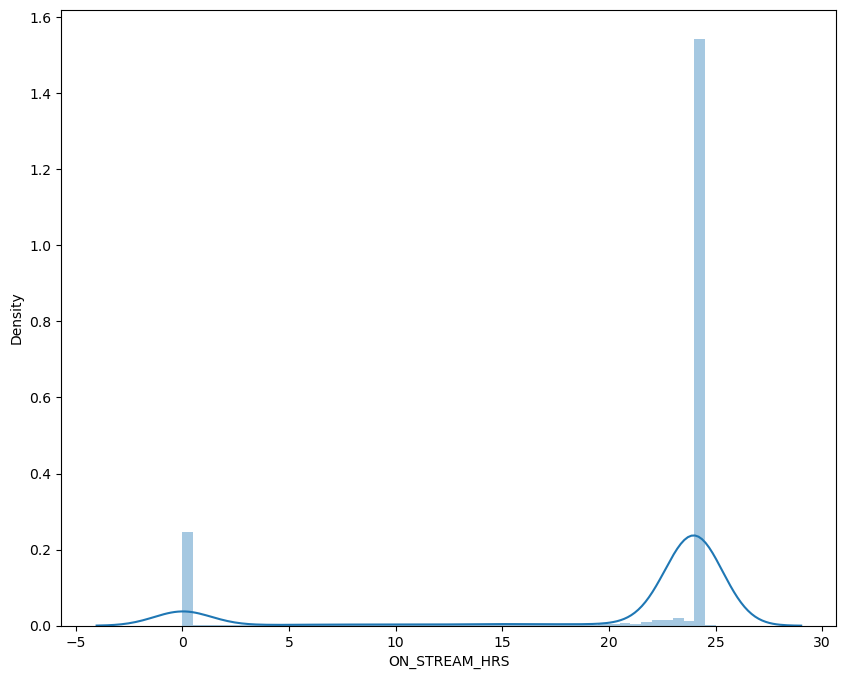

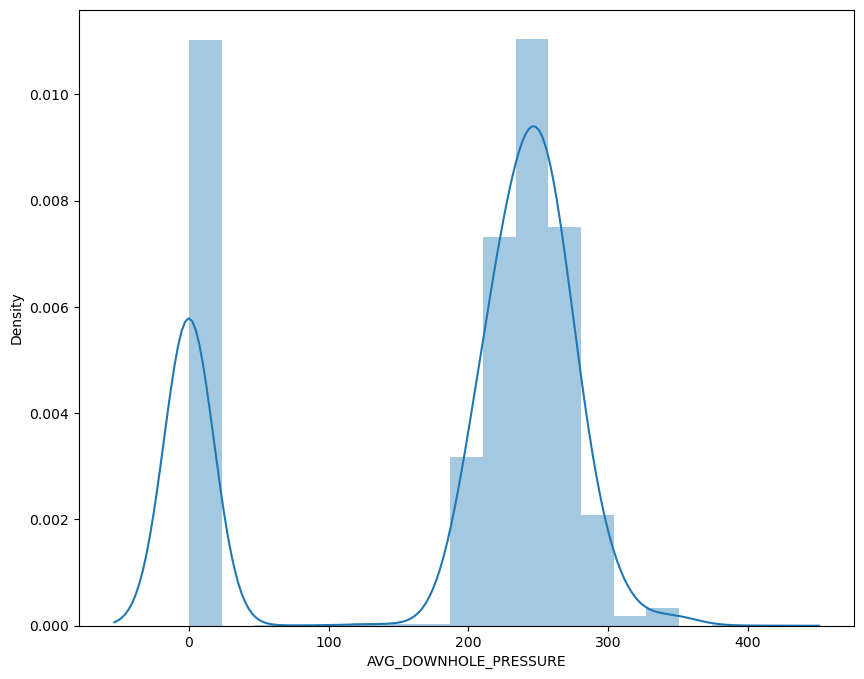

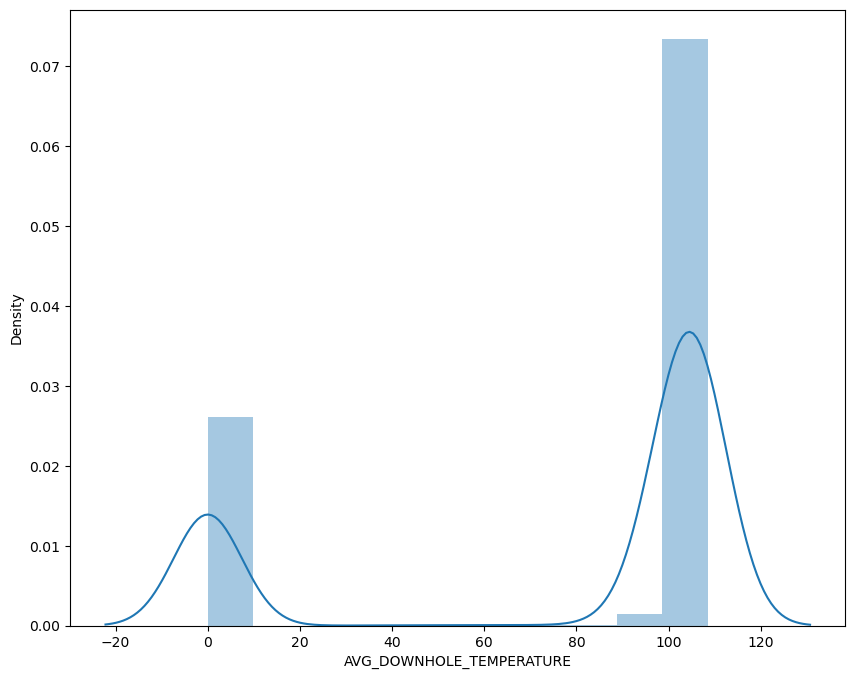

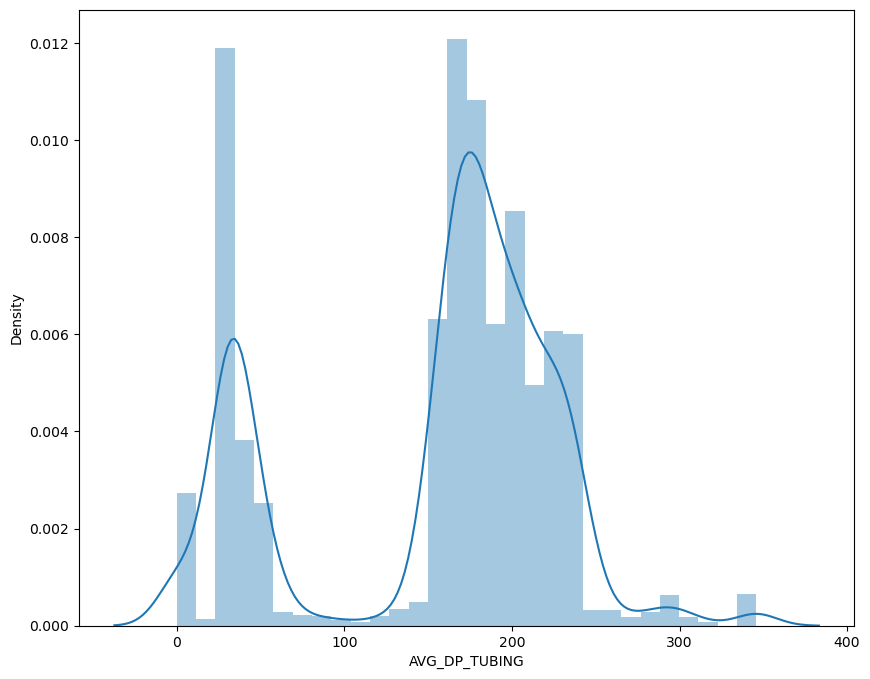

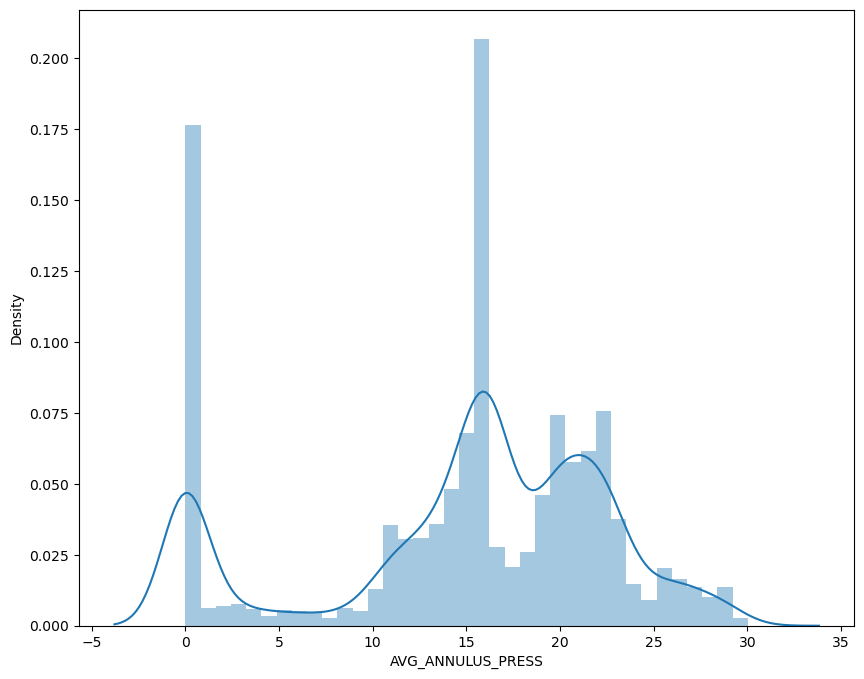

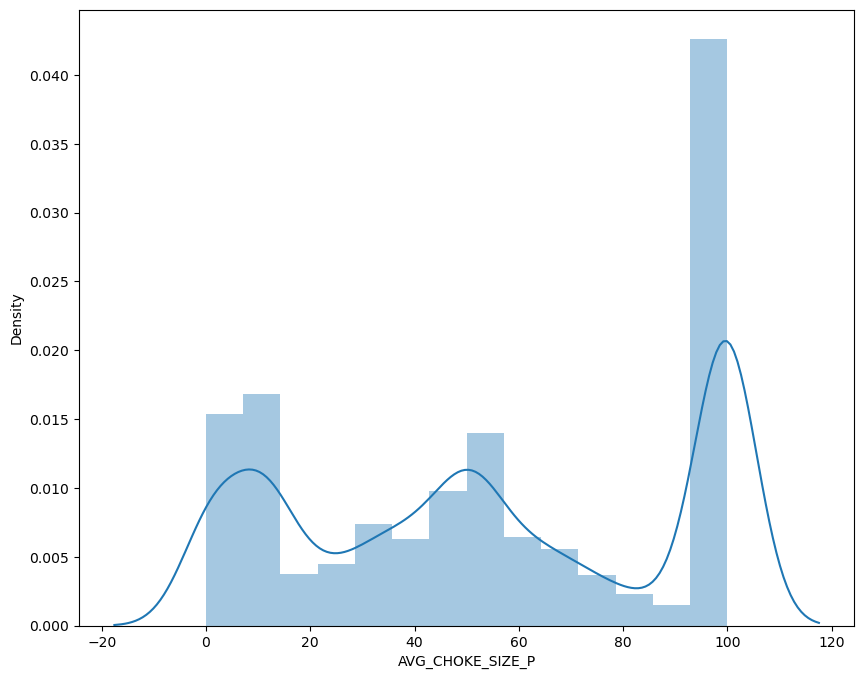

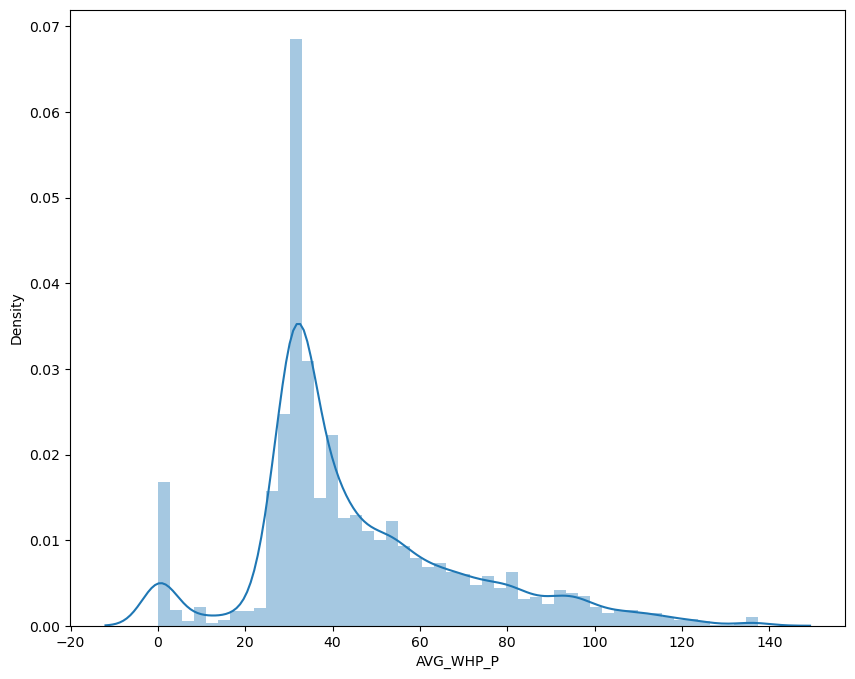

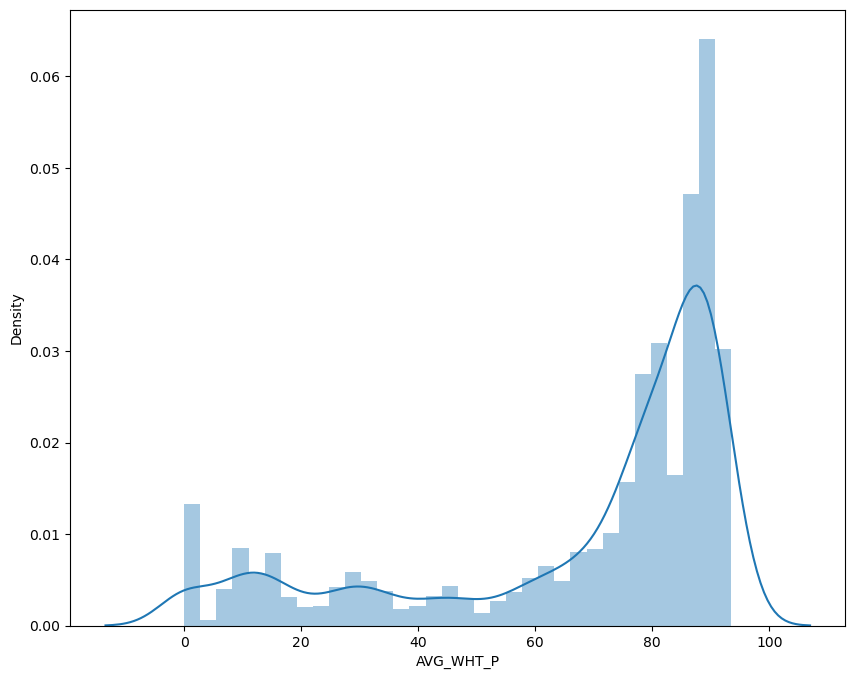

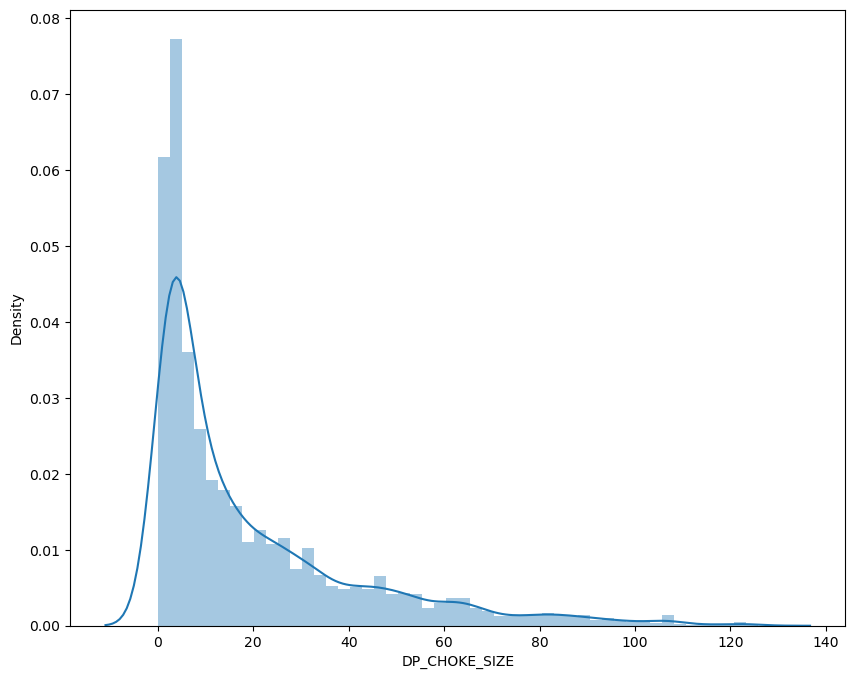

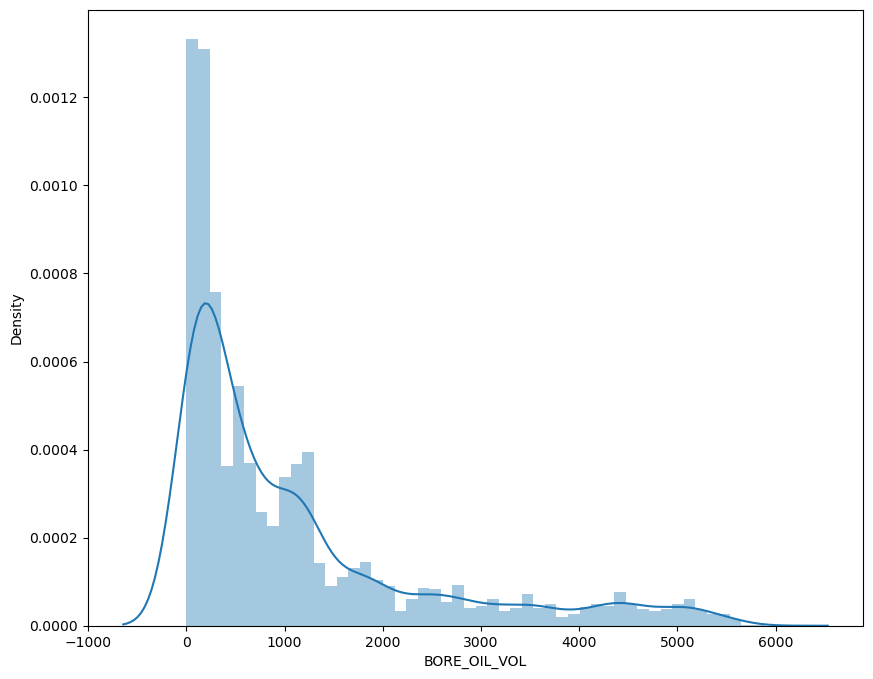

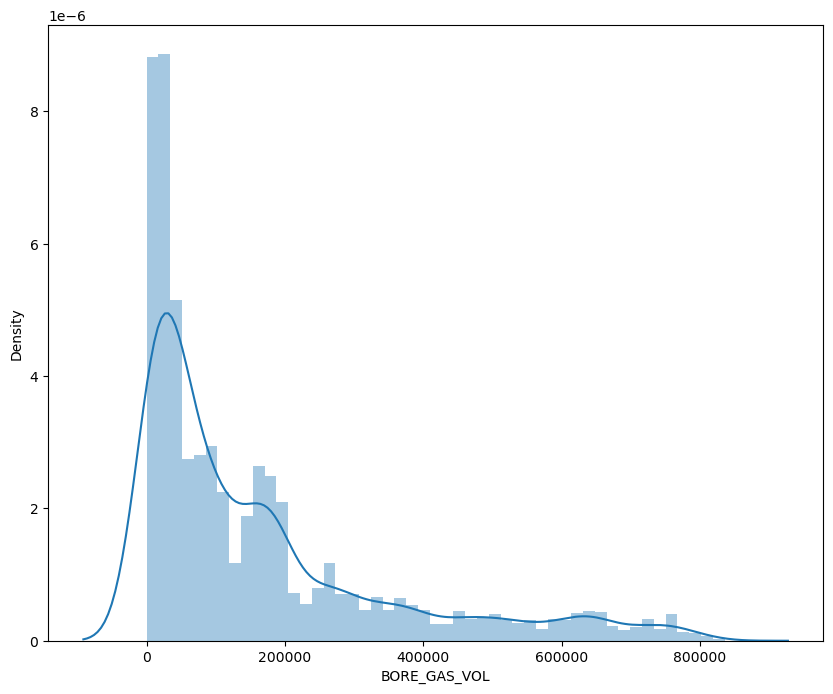

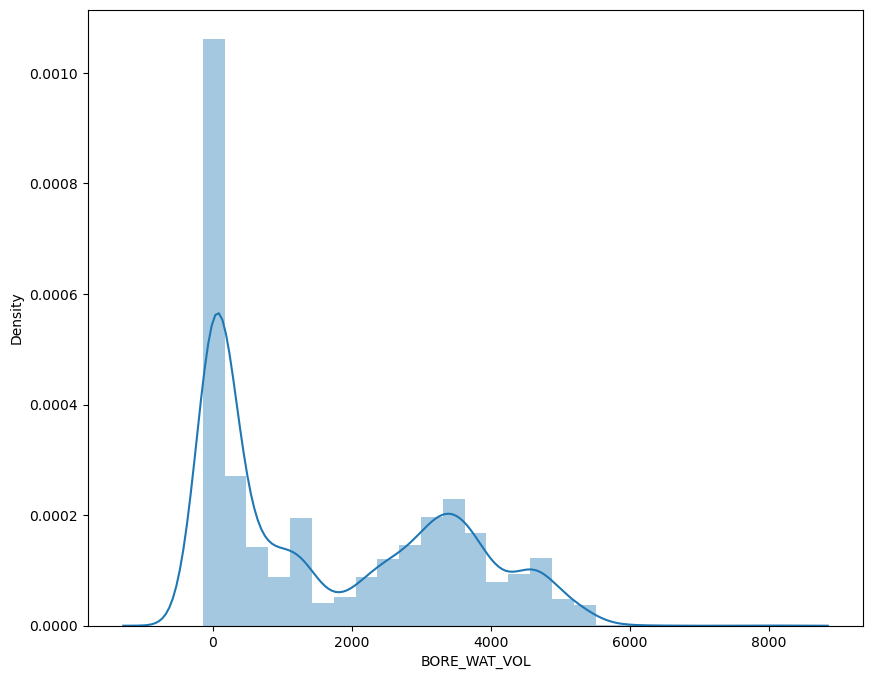

In [71]:
for i in df_num.columns:
    sns.distplot(df_num[i])
    plt.xlabel(i)
    plt.show()

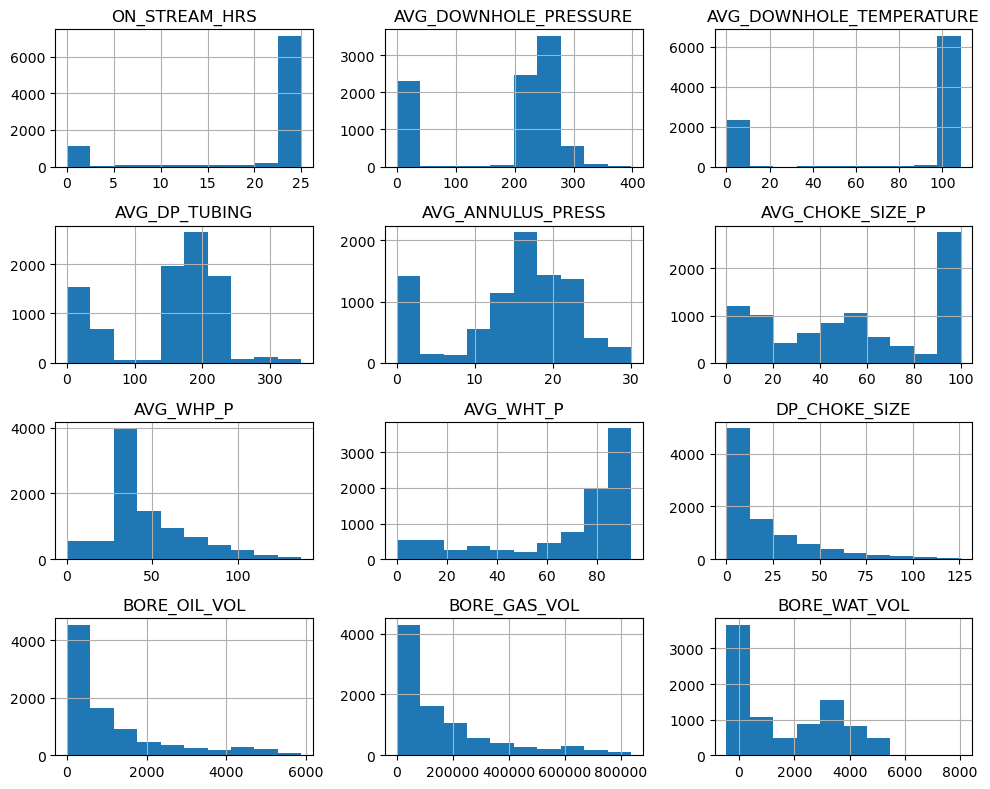

In [72]:
df.drop('DATEPRD', axis =1).hist()
plt.tight_layout()

`Inference:`
    
- We can a mix of distributions here.
- Few are right skewed and few are normally distributed.
- For the target column, we can see a bar of values near 0 and rest all the other values near 100, so this should be addressed.

#### For Categorical data

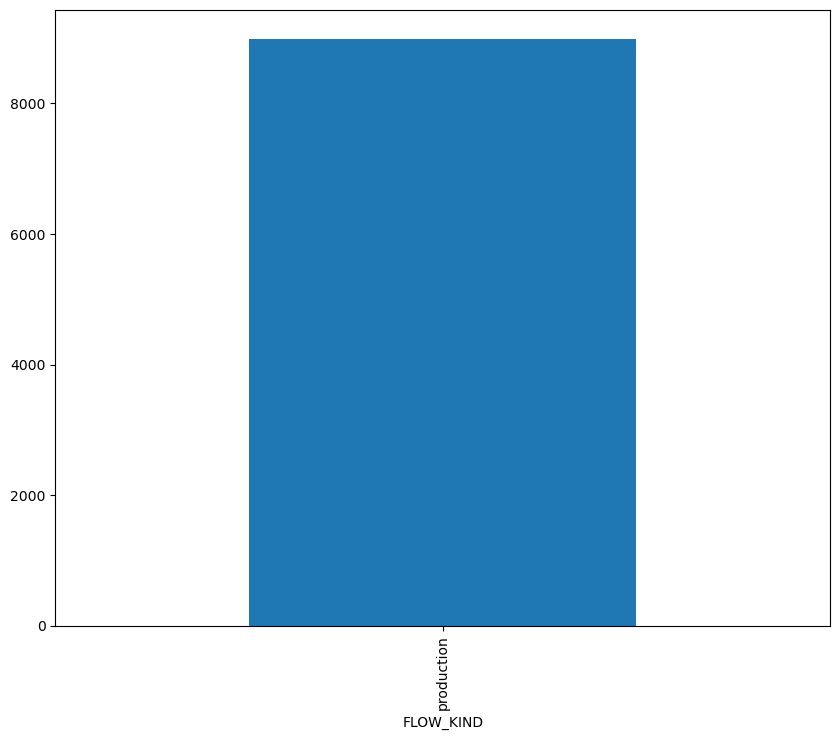

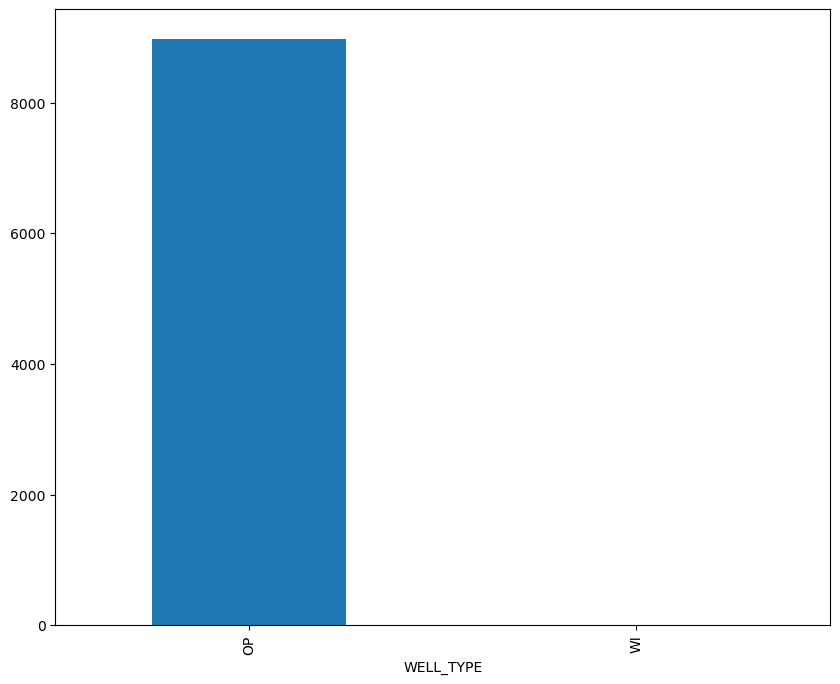

In [73]:
for i in df_cat.columns:
    df_cat[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.show()

In [74]:
# After preprocessing we are only left with the production data and in the well type we only have OP.

### Categorical - Numerical

In [75]:
df

DATEPRD  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0    2014-04-07            0.0                0.00000   
4    2014-04-11            0.0              310.37614   
5    2014-04-12            0.0              303.50078   
6    2014-04-13            0.0              303.53481   
7    2014-04-14            0.0              303.78228   
...         ...            ...                    ...   
8996 2016-09-13            0.0              345.90677   
8997 2016-09-14            0.0              345.90677   
8998 2016-09-15            0.0              345.90677   
8999 2016-09-16            0.0              345.90677   
9000 2016-09-17            0.0              345.90677   

      AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                      0.00000        0.00000                0.0   
4                     96.87589      277.27826                0.0   
5                     96.92339      281.44744                0.0   
6                     96.95885      276.03200                0.0   
7                     96.96873      282.78676                0.0   
...                        ...            ...                ...   
8996                  90.03433      345.90677                0.0   
8997                  90.03433      345.90677                0.0   
8998                  90.03433      345.90677                0.0   
8999                  90.03433      345.90677                0.0   
9000                  90.03433      345.90677                0.0   

      AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0             0.000000    0.00000    0.00000        0.00000           0.0   
4             1.215987   33.09788   10.47992       33.07195           0.0   
5             3.087015   22.05334    8.70429       22.05334           0.0   
6             1.962365   27.50281    9.42315       16.16326           0.0   
7             0.000000   20.99552    8.13137       20.73712           0.0   
...                ...        ...        ...            ...           ...   
8996          0.999251    0.00000    0.00000       13.97408           0.0   
8997          1.049490    0.00000    0.00000       14.06316           0.0   
8998          0.974846    0.00000    0.00000       14.17445           0.0   
8999          0.968742    0.00000    0.00000       14.23277           0.0   
9000          0.990500    0.00000    0.00000       14.26085           0.0   

      BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND WELL_TYPE  
0              0.0           0.0  production        WI  
4              0.0           0.0  production        OP  
5              0.0           0.0  production        OP  
6              0.0           0.0  production        OP  
7              0.0           0.0  production        OP  
...            ...           ...         ...       ...  
8996           0.0           0.0  production        OP  
8997           0.0           0.0  production        OP  
8998           0.0           0.0  production        OP  
8999           0.0           0.0  production        OP  
9000           0.0           0.0  production        OP  

[8980 rows x 15 columns]

### Box Plots

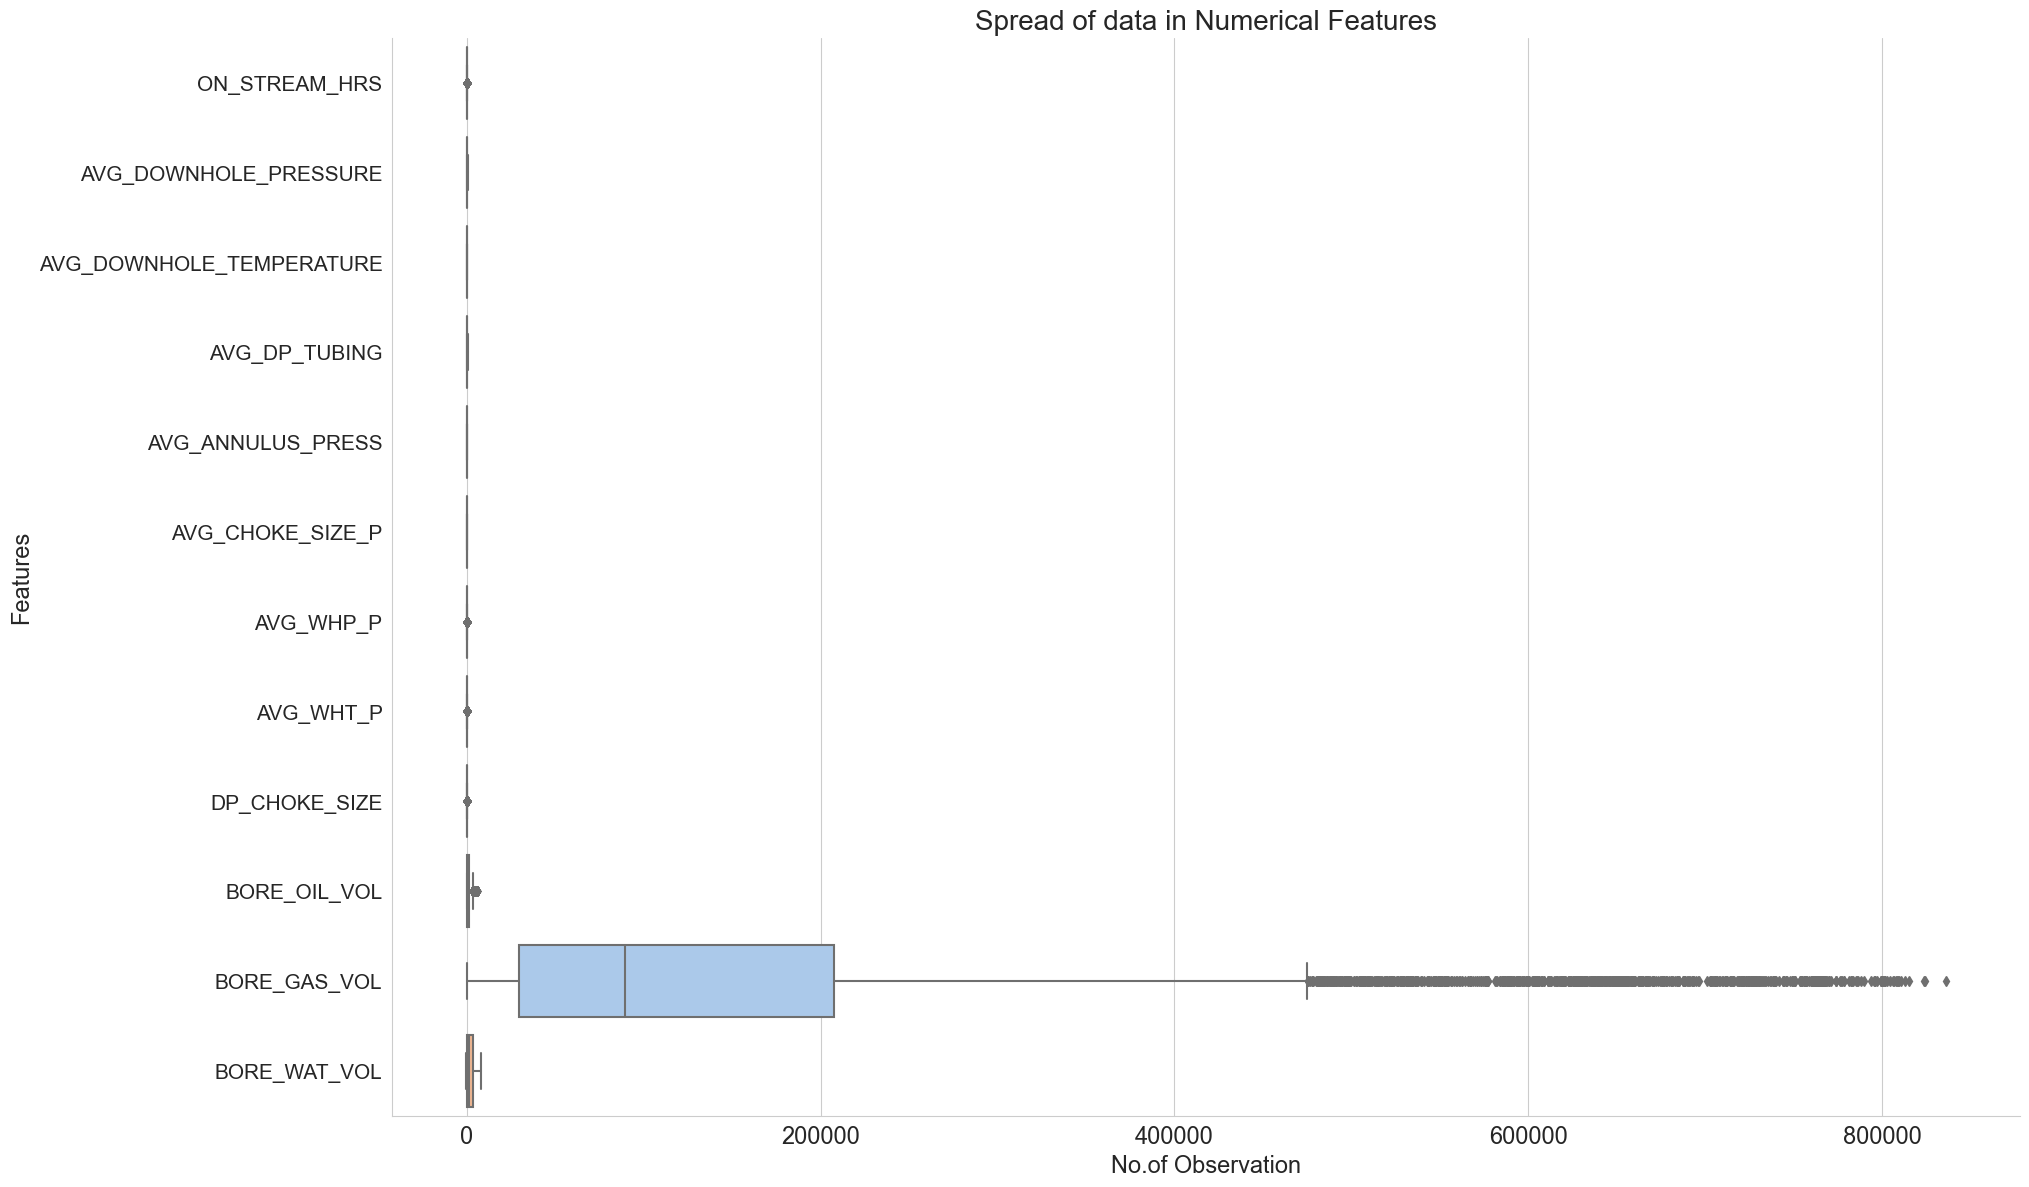

In [76]:
sns.set_style("whitegrid")
plt.subplots(figsize=(21, 14))
color = sns.color_palette('pastel')

sns.boxplot(data = df_num, orient='h', palette=color)

plt.title('Spread of data in Numerical Features', size = 20)

plt.xlabel('No.of Observation', size = 17)

plt.ylabel('Features', size = 17)

plt.xticks(size = 17)

plt.yticks(size = 15)

sns.despine()

plt.show()

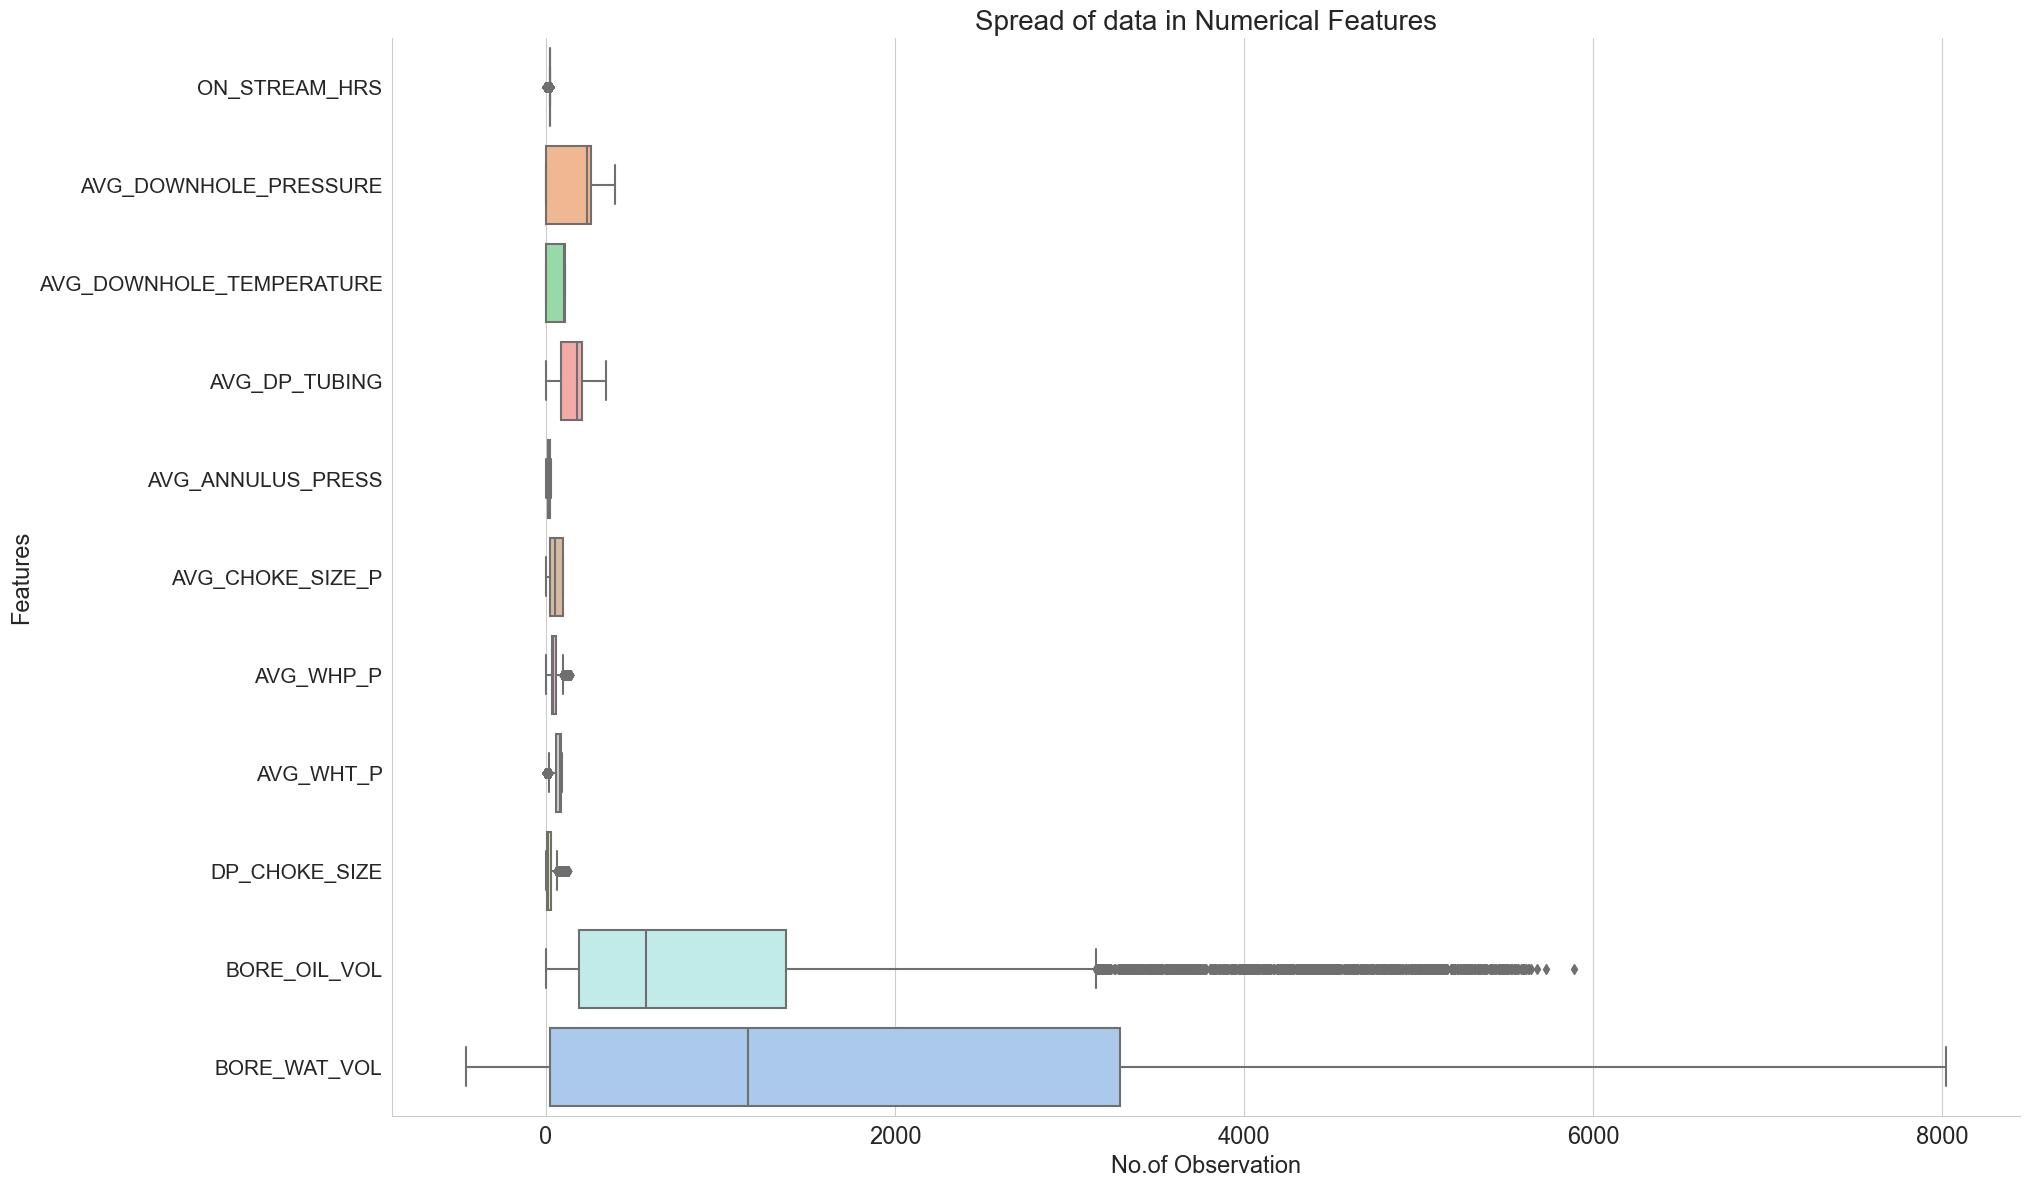

In [77]:
sns.set_style("whitegrid")
plt.subplots(figsize=(21, 14))
color = sns.color_palette('pastel')

sns.boxplot(data = df_num.drop('BORE_GAS_VOL',axis = 1), orient='h', palette=color)

plt.title('Spread of data in Numerical Features', size = 20)

plt.xlabel('No.of Observation', size = 17)

plt.ylabel('Features', size = 17)

plt.xticks(size = 17)

plt.yticks(size = 15)

sns.despine()

plt.show()

`Inference:`
    
- The box plot indicates that water volume (BORE_WAT_VOL) has the most observations and shows a wide spread, suggesting significant variability in water production.
- Oil volume (BORE_OIL_VOL) also has many observations but with less variability. Other features have fewer observations and generally show a smaller spread, indicating less variability in their measurements. There are no clear outliers in the data, which means most values fall within expected ranges.

### Bar Plots

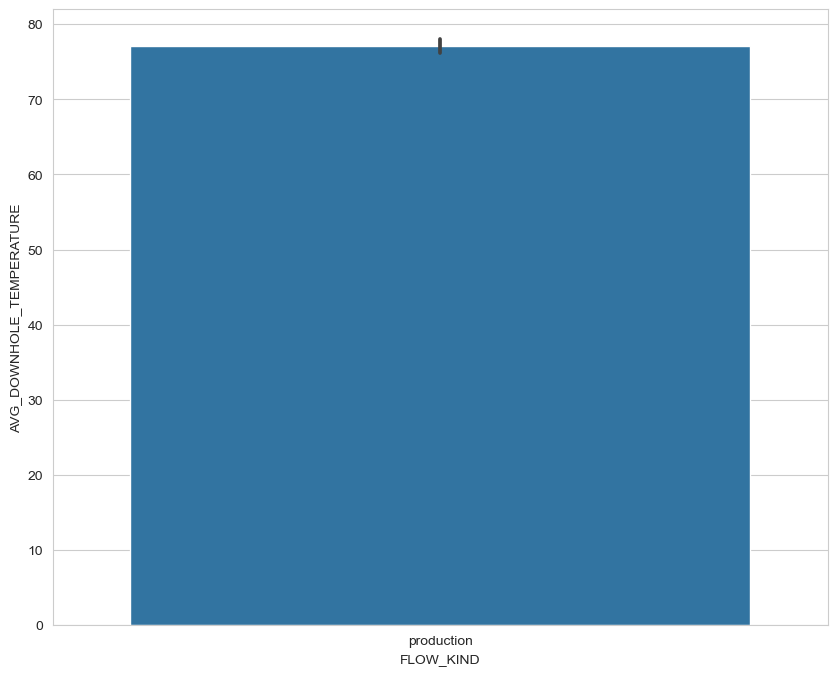

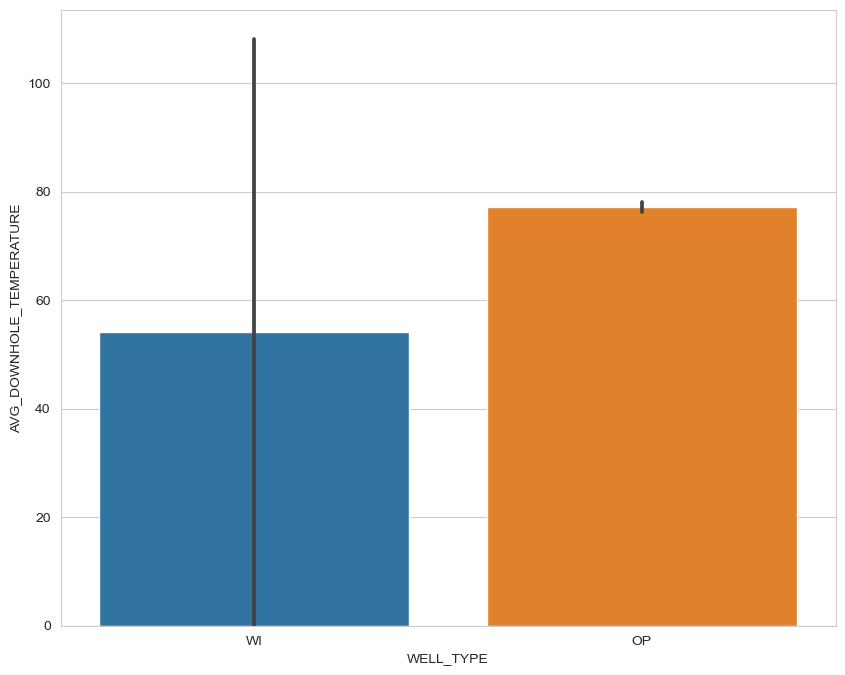

In [78]:
for i in df_cat.columns:
    sns.barplot(x=i,y='AVG_DOWNHOLE_TEMPERATURE',data=df)
    plt.xlabel(i)
    plt.ylabel('AVG_DOWNHOLE_TEMPERATURE')
    plt.show()

### Violin Plots

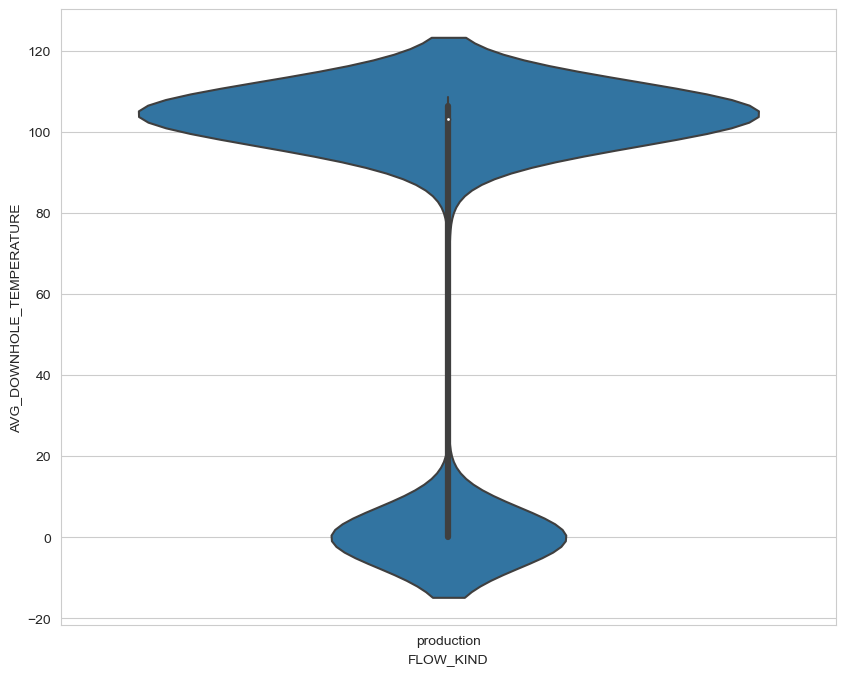

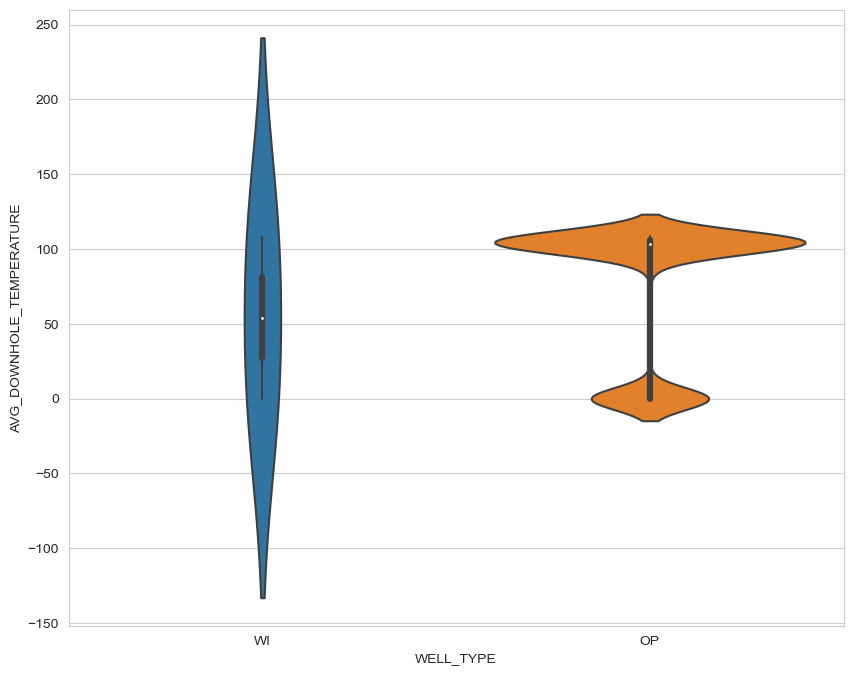

In [79]:
for i in df_cat.columns:
    sns.violinplot(x=i,y='AVG_DOWNHOLE_TEMPERATURE',data=df)
    plt.xlabel(i)
    plt.ylabel('AVG_DOWNHOLE_TEMPERATURE')
    plt.show()

### Categorical - Numerical

In [80]:
df_num.columns

Index(['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
       'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

In [81]:
df_cat.columns

Index(['FLOW_KIND', 'WELL_TYPE'], dtype='object')

In [82]:
df['FLOW_KIND'].unique()

array(['production'], dtype=object)

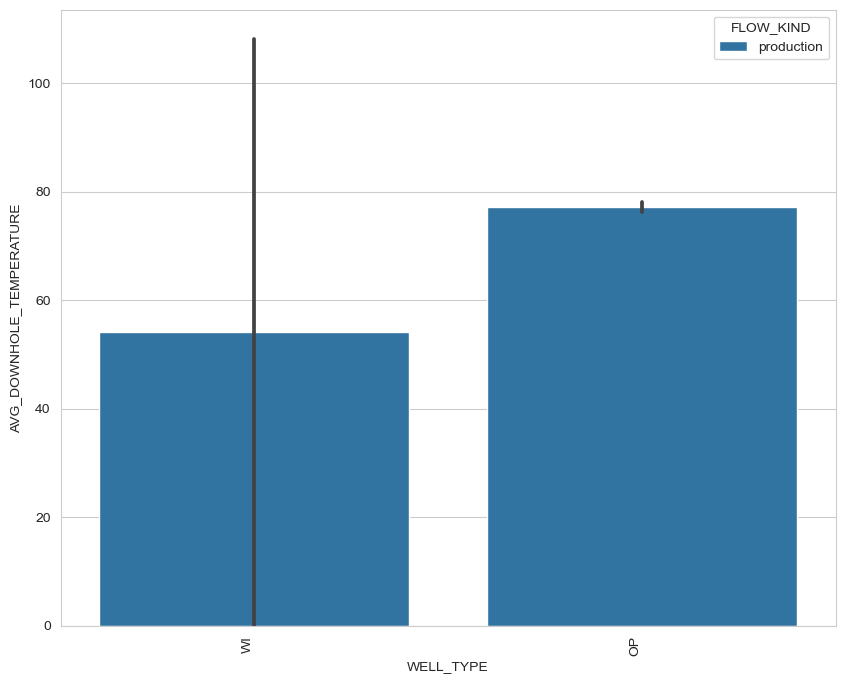

In [83]:
sns.barplot(x='WELL_TYPE', y='AVG_DOWNHOLE_TEMPERATURE', hue='FLOW_KIND', data=df, dodge=True)


plt.xticks(rotation=90)


for label in plt.gca().get_xticklabels():
    label.set_horizontalalignment('right')

plt.show()

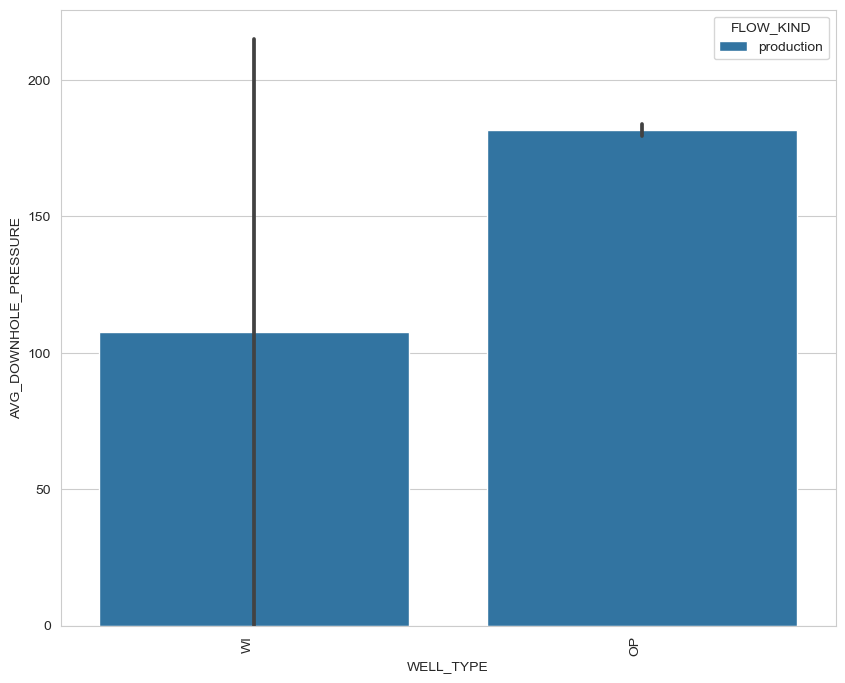

In [84]:
sns.barplot(x='WELL_TYPE', y='AVG_DOWNHOLE_PRESSURE', hue='FLOW_KIND', data=df, dodge=True)


plt.xticks(rotation=90)


for label in plt.gca().get_xticklabels():
    label.set_horizontalalignment('right')

plt.show()

### Correlation`

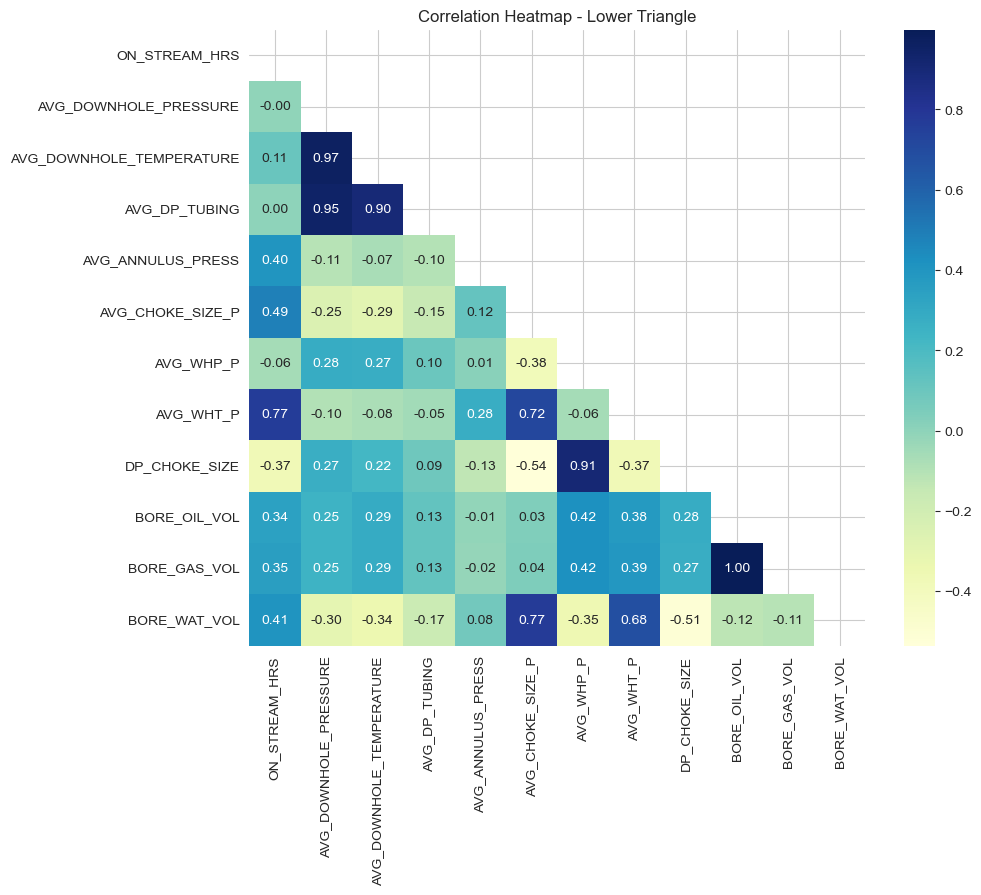

In [85]:
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="YlGnBu", fmt=".2f", square=True)
plt.title("Correlation Heatmap - Lower Triangle")
plt.show()

`Inference:`

- The correlation heatmap shows that AVG_DOWNHOLE_TEMPERATURE is highly correlated with AVG_DOWNHOLE_PRESSURE, suggesting they tend to increase or decrease together. 
- AVG_WHP_P and AVG_WHT_P also show a strong positive correlation, indicating a similar relationship. The heatmap's dark colors for some variables reveal strong correlations, while lighter colors suggest weaker or no correlation. - - Notably, DP_CHOKE_SIZE has a strong negative correlation with AVG_WHP_P, indicating they typically move in opposite directions.

In [86]:
#There is high multicollinearity in the data. 
# Very strong positive correlation between bore oil volume and bore gas volume.
# Better to drop either of the columns.

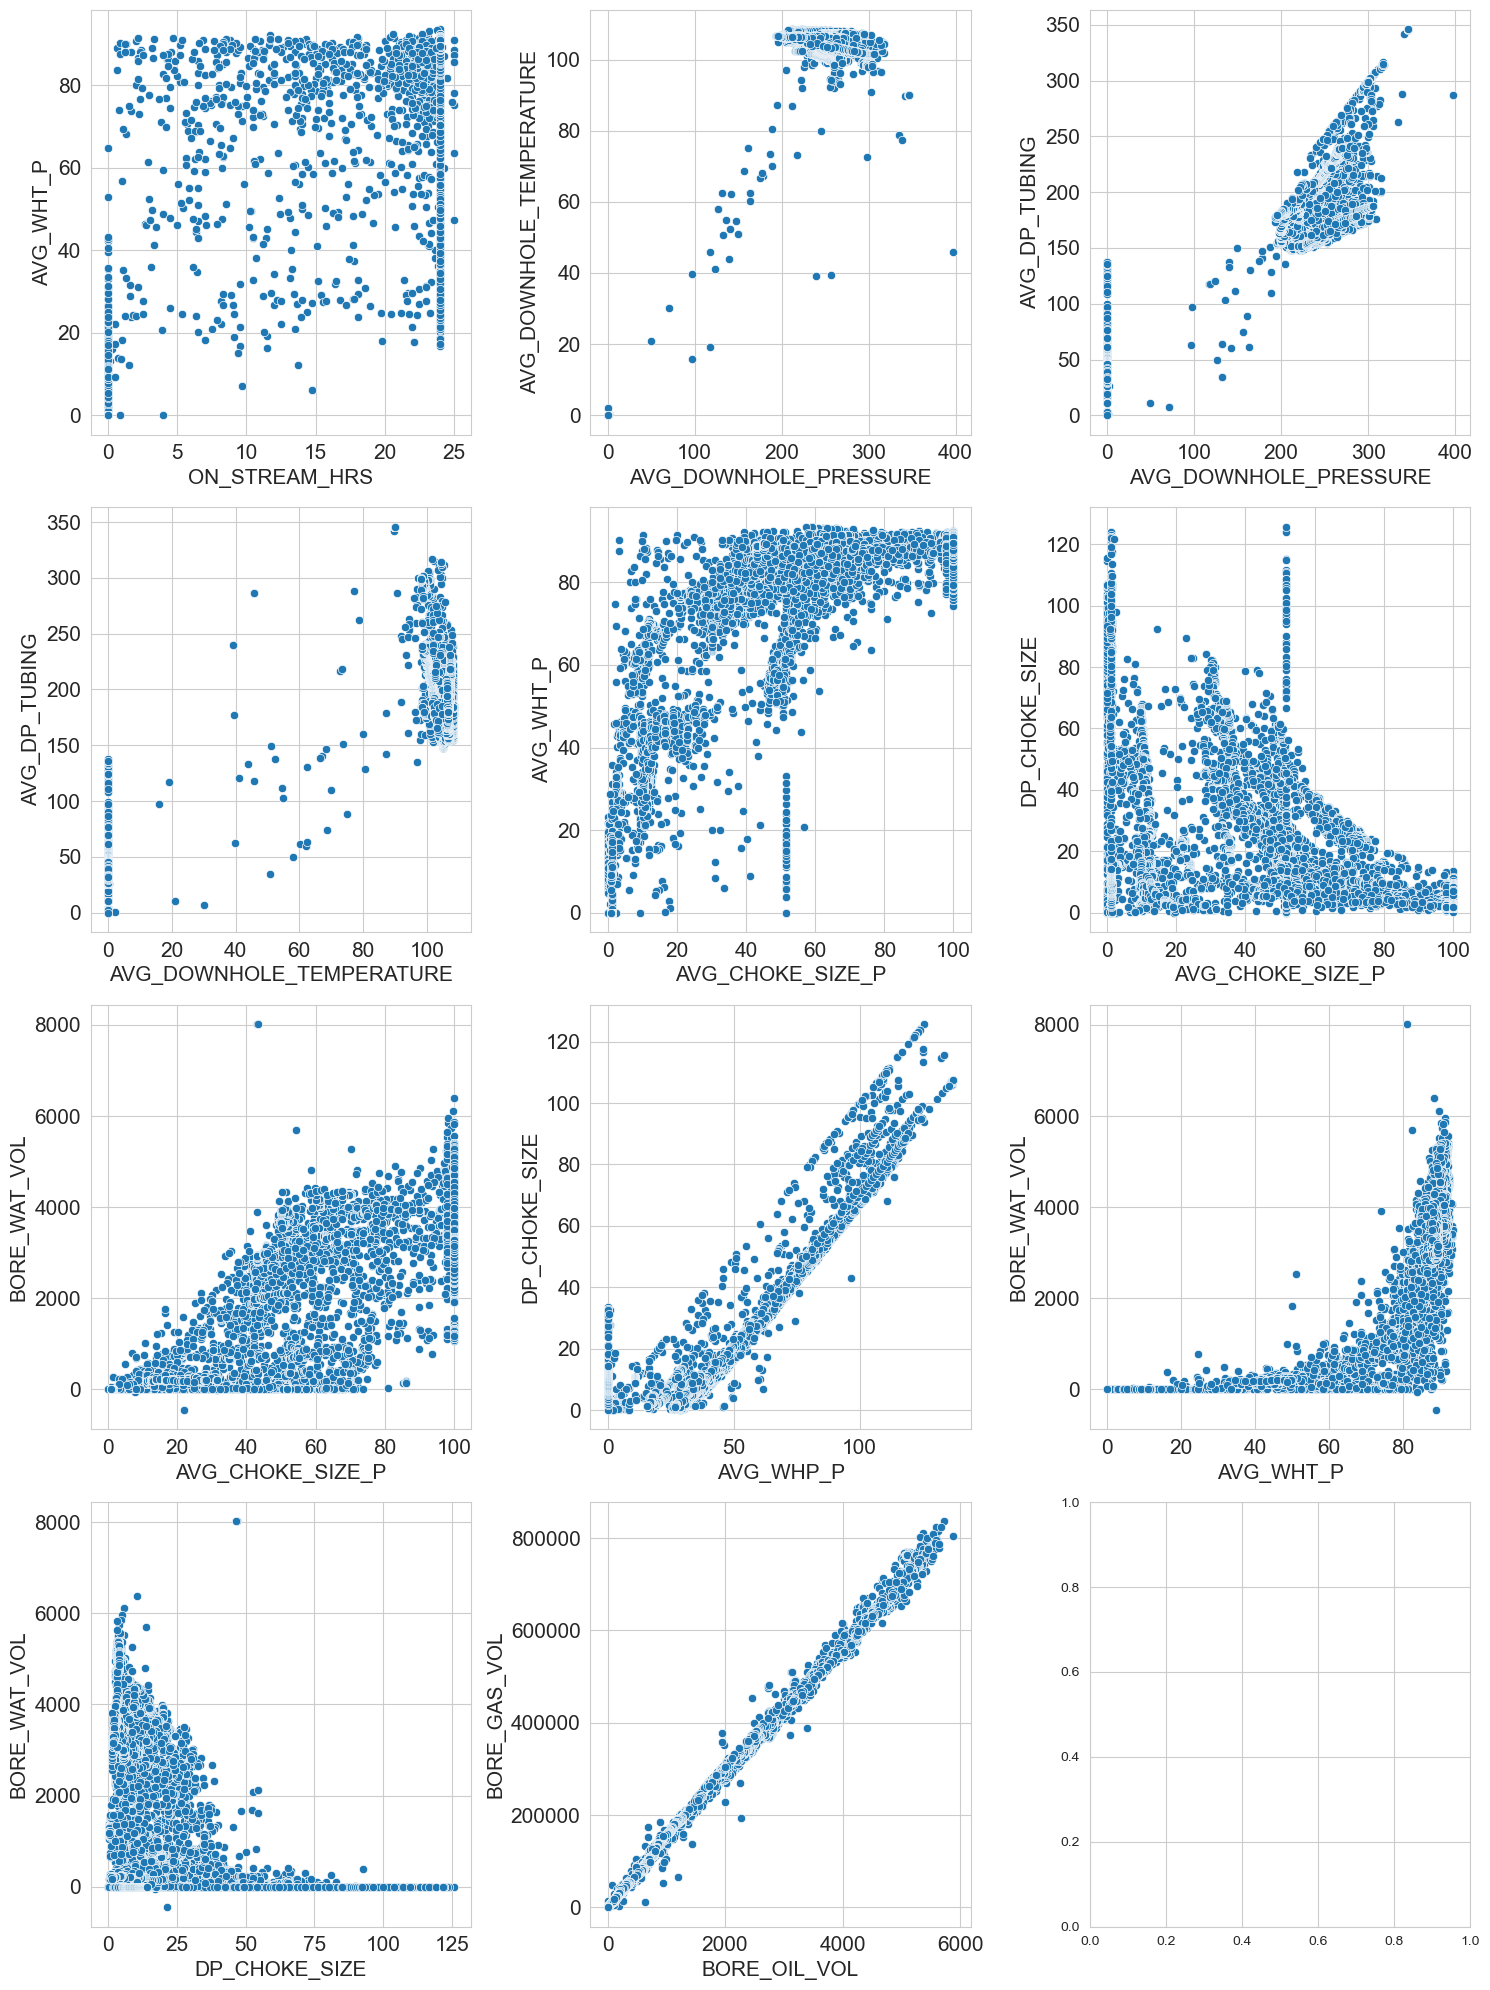

In [87]:
import math

# Assuming df_num is your numerical DataFrame
correlation_matrix = df_num.corr()

# Filter out pairs of features with correlation greater than 0.5
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Determine the number of rows and columns for the subplot matrix
num_plots = len(high_corr_pairs)
num_columns = int(math.sqrt(num_plots))
num_rows = math.ceil(num_plots / num_columns)

# Create subplots in a matrix form
fig, axes = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 5 * num_rows))
axes = axes.flatten()  # Flatten the matrix of axes

# Plot scatter plots for high correlated pairs
for index, (i, j) in enumerate(high_corr_pairs):
    ax = axes[index]
    sns.scatterplot(data=df_num, x=i, y=j, ax=ax)
    ax.set_xlabel(i, size=15)
    ax.set_ylabel(j, size=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

# Adjust the layout
plt.tight_layout()
plt.show()

In [88]:
df_num['BORE_GAS_VOL'].sum()

1460657131.8799999

In [89]:
df_num['BORE_OIL_VOL'].sum()

9939664.1

In [90]:
# Its better to drop Bore oil vol since we have less data in this compared to bore gas volume.

#### Also, if we include both the columns, then its not recommended since very strong positive correlation.

In [91]:
df.drop('BORE_OIL_VOL', axis = 1, inplace = True)

In [92]:
df.dtypes

DATEPRD                     datetime64[ns]
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
FLOW_KIND                           object
WELL_TYPE                           object
dtype: object

### Statistical tests

### For Numeric Columns

In [93]:
numeric_columns = df_num.columns.tolist()
numeric_columns.remove('AVG_DOWNHOLE_TEMPERATURE')  # Remove the target variable

# Perform statistical tests for each numeric variable
p_values = {}
for column in numeric_columns:
    # Perform Pearson correlation test
    correlation, p_value = stats.pearsonr(df_num[column], df_num['AVG_DOWNHOLE_TEMPERATURE'])
    p_values[column] = p_value

# Display the p-values
for column, p_value in p_values.items():
    print(f"{column}: p-value = {p_value}")

ON_STREAM_HRS: p-value = 7.86776611404082e-24
AVG_DOWNHOLE_PRESSURE: p-value = 0.0
AVG_DP_TUBING: p-value = 0.0
AVG_ANNULUS_PRESS: p-value = 4.016242372255136e-11
AVG_CHOKE_SIZE_P: p-value = 1.3791357935463643e-168
AVG_WHP_P: p-value = 1.126122575238344e-154
AVG_WHT_P: p-value = 3.154636842923036e-13
DP_CHOKE_SIZE: p-value = 1.15042942670228e-100
BORE_OIL_VOL: p-value = 2.6451794011716775e-173
BORE_GAS_VOL: p-value = 3.039089729766467e-170
BORE_WAT_VOL: p-value = 3.096040384134317e-247


In [94]:
import pandas as pd
import statsmodels.api as sm


# Define independent variables (X) and the target variable (y)
X = df_num.drop('AVG_DOWNHOLE_TEMPERATURE', axis = 1)
y = df_num['AVG_DOWNHOLE_TEMPERATURE']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     AVG_DOWNHOLE_TEMPERATURE   R-squared:                       0.972
Model:                                  OLS   Adj. R-squared:                  0.972
Method:                       Least Squares   F-statistic:                 2.869e+04
Date:                      Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                              23:30:09   Log-Likelihood:                -30942.
No. Observations:                      8980   AIC:                         6.191e+04
Df Residuals:                          8968   BIC:                         6.199e+04
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

`Inference:`
    
- From the above statistical test, p-values lower than a selected level of significance (e.g., 0.05) usually indicate a significant association between the numerical variable and target variable. In our case almost all the p-values are less than 0.05, which means that most of the factors have significant association with the target variable Downholw Temperature at 0.05 level.

- However, choosing significance level is arbitrary and could be adjusted according to our specific needs and circumstances of our analysis. Statistically, while signiﬁcance is critical in evaluating whether or not a predictor is important; there are other things to consider as well.

### Data Discripancy

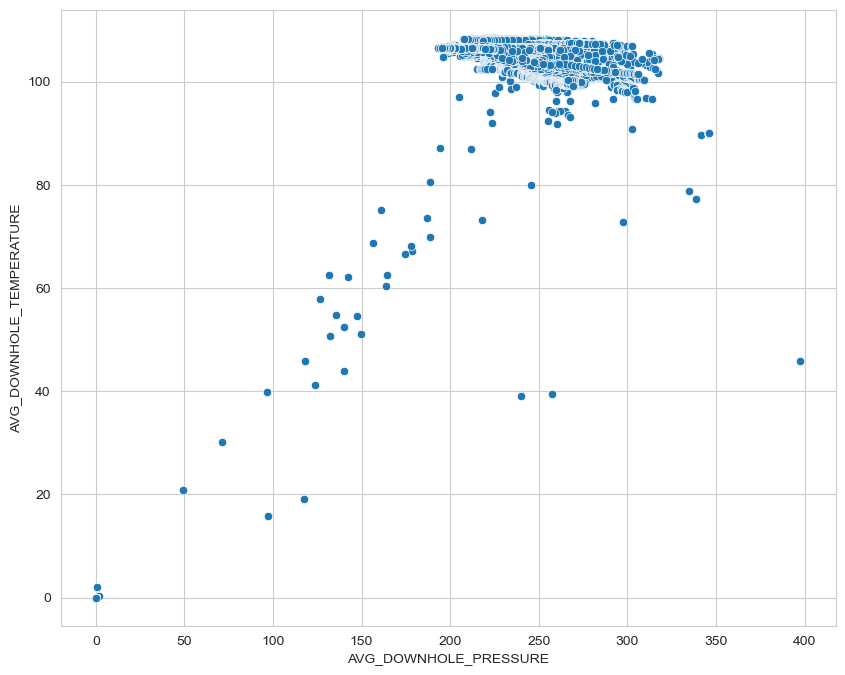

In [95]:
sns.scatterplot(data = df, x = 'AVG_DOWNHOLE_PRESSURE', y = 'AVG_DOWNHOLE_TEMPERATURE')
plt.show()

`Inference:`
    
- As we can see from the above plot, there is a very positive correlation between the temperature and pressure.
- But infact there are many mis calculations in the data.
- There are many 0 values of the temperature in our dataset.
- So, we have removed the 0 values and also the temperature would be greater than 100 at the bottom hole for sure, so lets consider all the values above 100 for the temperature and do the model building.

In [96]:
df_try = df[df.AVG_DOWNHOLE_TEMPERATURE>100].reset_index(drop = True)

In [97]:
df_try

DATEPRD  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0    2014-04-21         11.500             301.375641   
1    2014-04-22         24.000             289.421362   
2    2014-04-23         24.000             270.239793   
3    2014-04-24         24.000             262.842747   
4    2014-04-25         24.000             255.526995   
...         ...            ...                    ...   
5658 2016-07-05         24.000             195.207173   
5659 2016-07-06         18.375             195.305708   
5660 2016-07-07          0.000             232.975410   
5661 2016-07-08          0.000             247.572870   
5662 2016-07-09          0.000             252.226560   

      AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                   102.676379     204.795183           0.000000   
1                   106.353209     182.059312           0.000000   
2                   107.643779     171.052782          16.184653   
3                   107.869234     168.241977          16.184653   
4                   107.971137     165.538903          16.184653   
...                        ...            ...                ...   
5658                106.506781     179.598751          20.629658   
5659                106.507232     179.547756          20.404848   
5660                104.231790     230.938930           3.710170   
5661                103.774460     247.361840           1.072600   
5662                103.477910     246.874850           0.028540   

      AVG_CHOKE_SIZE_P   AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_GAS_VOL  \
0            20.989748   96.580458  19.196819      69.775570          0.00   
1            43.343451  107.362050  37.939251      78.935409      90439.09   
2            47.167523   99.187011  60.756579      70.627109     165720.39   
3            47.732310   94.600770  63.046800      66.049151     221707.31   
4            48.533769   89.988092  64.547229      61.405386     178063.52   
...                ...         ...        ...            ...           ...   
5658         31.523457   15.608422  49.841092       1.204128      23090.47   
5659         24.922565   15.757952  48.734245       1.302808      17537.08   
5660          8.073307    2.036480  33.531510       0.142540          0.00   
5661          1.268485    0.211030  17.561470       0.159580          0.00   
5662          1.308374    5.351710  17.018110       4.889070          0.00   

      BORE_WAT_VOL   FLOW_KIND WELL_TYPE  
0             0.00  production        OP  
1             0.00  production        OP  
2             0.00  production        OP  
3             0.00  production        OP  
4             0.00  production        OP  
...            ...         ...       ...  
5658        202.76  production        OP  
5659        155.70  production        OP  
5660          0.00  production        OP  
5661          0.00  production        OP  
5662          0.00  production        OP  

[5663 rows x 14 columns]

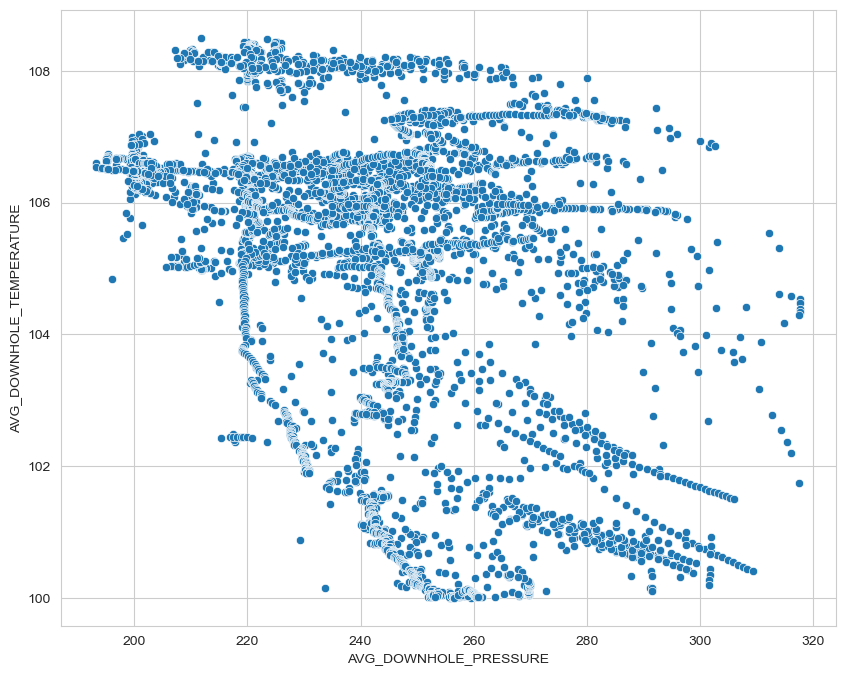

In [98]:
sns.scatterplot(data = df_try, x = 'AVG_DOWNHOLE_PRESSURE', y = 'AVG_DOWNHOLE_TEMPERATURE');

### Recheck the correlation

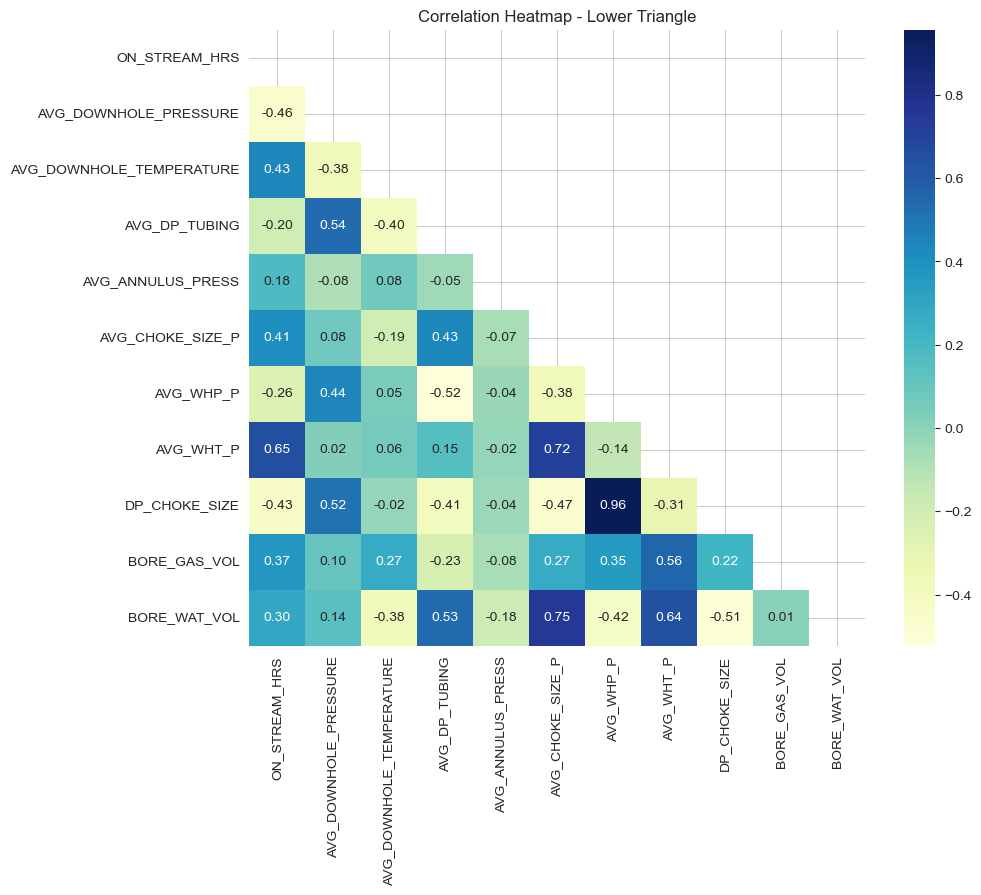

In [99]:
corr_matrix = df_try.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="YlGnBu", fmt=".2f", square=True)
plt.title("Correlation Heatmap - Lower Triangle")
plt.show()

`Inference:`

- From the corrected correlation heatmap, AVG_WHT_P (wellhead temperature) shows a strong positive correlation with ON_STREAM_HRS, indicating that longer streaming hours are associated with higher temperatures at the wellhead. - --- AVG_DOWNHOLE_PRESSURE and DP_CHOKE_SIZE have a strong positive correlation, suggesting that changes in choke size are closely related to the downhole pressure. 
- BORE_WAT_VOL (bore water volume) has a strong positive correlation with AVG_DP_TUBING, meaning as the tubing pressure differential increases, the water volume tends to increase as well.
- Overall, the adjustments to the dataset (removing temperatures below 100) appear to have clarified some relationships between variables, such as downhole conditions and production volumes.

### Model Building

In [100]:
df_num = df_try.select_dtypes(include=np.number)
df_cat = df_try.select_dtypes(include='O')

#### Scaling

In [101]:
df_num1 = df_num.drop('AVG_DOWNHOLE_TEMPERATURE', axis = 1)

In [102]:
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_num1)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num1.columns)

df_num_scaled.head(2)

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0       -1.27507               2.528882       0.675835          -1.843964   
1        0.41205               2.032278      -0.220422          -1.843964   

   AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_GAS_VOL  \
0         -0.725509   1.833330  -1.874399        1.98764     -1.039439   
1         -0.034155   2.285324  -1.125038        2.39213     -0.611141   

   BORE_WAT_VOL  
0     -0.835616  
1     -0.835616

In [103]:
df_cat = df_cat.reset_index(drop = True)

In [104]:
dummy = pd.get_dummies(df_cat)
dummy.head(2)

FLOW_KIND_production  WELL_TYPE_OP  WELL_TYPE_WI
0                     1             1             0
1                     1             1             0

#### Dividing the independent and dependent variables

In [105]:
X = pd.concat([df_num_scaled, dummy], axis = 1)
X.head()

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0       -1.27507               2.528882       0.675835          -1.843964   
1        0.41205               2.032278      -0.220422          -1.843964   
2        0.41205               1.235439      -0.654304           0.180978   
3        0.41205               0.928152      -0.765107           0.180978   
4        0.41205               0.624241      -0.871663           0.180978   

   AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_GAS_VOL  \
0         -0.725509   1.833330  -1.874399       1.987640     -1.039439   
1         -0.034155   2.285324  -1.125038       2.392130     -0.611141   
2          0.084115   1.942604  -0.212754       2.025243     -0.254627   
3          0.101583   1.750336  -0.121187       1.823085      0.010513   
4          0.126371   1.556960  -0.061196       1.618020     -0.196173   

   BORE_WAT_VOL  FLOW_KIND_production  WELL_TYPE_OP  WELL_TYPE_WI  
0     -0.835616                     1             1             0  
1     -0.835616                     1             1             0  
2     -0.835616                     1             1             0  
3     -0.835616                     1             1             0  
4     -0.835616                     1             1             0

In [106]:
y = df_try['AVG_DOWNHOLE_TEMPERATURE']

#### Train Test Split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (4530, 13)
y_train (4530,)
X_test (1133, 13)
y_test (1133,)


### Building the initial model

In [108]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Evaluate the model
train_score = rf_regressor.score(X_train, y_train)
test_score = rf_regressor.score(X_test, y_test)

# Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Calculate additional evaluation metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print evaluation metrics
print('Train R^2 Score:', train_score)
print('Test R^2 Score:', test_score)
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train R^2 Score: 0.9953772571618629
Test R^2 Score: 0.9696137025267366
Train MSE: 0.022676740224479432
Test MSE: 0.15410094083400733


In [109]:
import plotly.express as px

# Fit the best model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = rf_regressor.predict(X_test)

# Create a DataFrame with actual and predicted values
df_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate the residuals
residuals = y_test - y_pred
df_model['Residuals'] = residuals

fig = px.scatter(df_model, x="Actual", y="Predicted", trendline="ols",
                title='Random Forest Regression Model Fit')
fig.show()

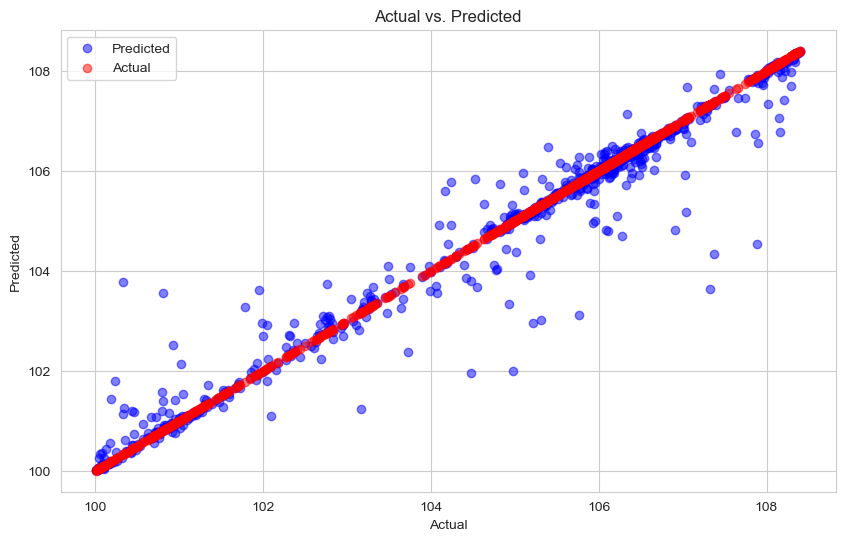

In [110]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

`Inference:`

-  As we can see the red dots are the actual values and the blue ones are the predicted ones.
- The actual values follow strict positive correlation.
-  And the predicted values are predicted a little different from the actual values.
- Also, there is overfitting in the data since there is good amount of difference between the training and testing data.
- Although the R2 value is really good, we should address this RMSE.
- Overfitting should be addressed.

In [111]:
# Lets build a scorecard for the different models and compare the performance

In [112]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define the DataFrame for the scorecard
scorecard_regression = pd.DataFrame(columns=['Model', 'Train_RMSE', 'Test_RMSE', 'R-squared', 'Train_Accuracy', 'Test_Accuracy'])

def model_regression(model_name, regressor, X_train, y_train, X_test, y_test):
    # Train the model
    model = regressor.fit(X_train, y_train)
    
    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate RMSE
    train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Calculate R-squared
    r2 = model.score(X_test, y_test)
    
    # Update the scorecard
    global scorecard_regression
    scorecard_regression = pd.concat([scorecard_regression, pd.DataFrame({'Model': [model_name],
                                                                          'Train_RMSE': [train_rmse],
                                                                          'Test_RMSE': [test_rmse],
                                                                          'R-squared': [r2],
                                                                          'Train_Accuracy': [model.score(X_train, y_train)],
                                                                          'Test_Accuracy': [model.score(X_test, y_test)]})], ignore_index=True)


In [113]:
#Linear Regression
model_regression("Linear Regression", LinearRegression(), X_train, y_train, X_test, y_test)

# Ridge Regression
model_regression("Ridge Regression", Ridge(), X_train, y_train, X_test, y_test)

# Lasso Regression
model_regression("Lasso Regression", Lasso(), X_train, y_train, X_test, y_test)

# ElasticNet Regression
model_regression("ElasticNet Regression", ElasticNet(), X_train, y_train, X_test, y_test)

# Decision Tree Regressor
model_regression("Decision Tree Regressor", DecisionTreeRegressor(), X_train, y_train, X_test, y_test)

# Random Forest Regressor
model_regression("Random Forest Regressor", RandomForestRegressor(), X_train, y_train, X_test, y_test)

# Gradient Boosting Regressor
model_regression("Gradient Boosting Regressor", GradientBoostingRegressor(), X_train, y_train, X_test, y_test)

# Support Vector Regressor (SVR)
model_regression("Support Vector Regressor", SVR(), X_train, y_train, X_test, y_test)

# K-Nearest Neighbors Regressor
model_regression("K-Nearest Neighbors Regressor", KNeighborsRegressor(), X_train, y_train, X_test, y_test)


In [114]:
scorecard_regression['Train_RMSE'] = scorecard_regression['Train_RMSE'].apply(lambda x: round(x, 6))
scorecard_regression['Test_RMSE'] = scorecard_regression['Test_RMSE'].apply(lambda x: round(x, 6))

In [115]:
scorecard_regression

Model  Train_RMSE  Test_RMSE  R-squared  \
0              Linear Regression    1.567514   1.560590   0.519769   
1               Ridge Regression    1.567406   1.560024   0.520117   
2               Lasso Regression    2.214830   2.252297  -0.000285   
3          ElasticNet Regression    1.951871   1.979690   0.227200   
4        Decision Tree Regressor    0.000000   0.515773   0.947545   
5        Random Forest Regressor    0.152537   0.381642   0.971280   
6    Gradient Boosting Regressor    0.489379   0.560741   0.937999   
7       Support Vector Regressor    0.581370   0.625805   0.922776   
8  K-Nearest Neighbors Regressor    0.318587   0.371481   0.972789   

   Train_Accuracy  Test_Accuracy  
0        0.499111       0.519769  
1        0.499180       0.520117  
2        0.000000      -0.000285  
3        0.223357       0.227200  
4        1.000000       0.947545  
5        0.995257       0.971280  
6        0.951179       0.937999  
7        0.931099       0.922776  
8        0.979309       0.972789

`Inference:`
    
- When we observe the above models, then we can interpret that few models are having good accuracies but high overfitting.
- For example Random Forest, Decision Tree and SVR, these models are having good R2 and high accuracies but these models are overfitting as well.
- Here the KNN Regressor has outperformed all the other models.
- It has good accuracies, R2 score and less overfitting as well.
- The above four models have performed very poor for our dataset.

In [116]:
#Since KNN Regressor is working really well, lets have a graph for the KNN Regressor as well.

### KNN Regressor

In [117]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

# Evaluate the model
train_score = knn_regressor.score(X_train, y_train)
test_score = knn_regressor.score(X_test, y_test)

# Make predictions
y_pred_train = knn_regressor.predict(X_train)
y_pred_test = knn_regressor.predict(X_test)

# Calculate additional evaluation metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print evaluation metrics
print('Train R^2 Score:', train_score)
print('Test R^2 Score:', test_score)
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train R^2 Score: 0.9793093302727289
Test R^2 Score: 0.9727888654008303
Train MSE: 0.10149752190517708
Test MSE: 0.13799843322742655


In [118]:
import plotly.express as px

# Fit the best model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = knn_regressor.predict(X_test)

# Create a DataFrame with actual and predicted values
df_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate the residuals
residuals = y_test - y_pred
df_model['Residuals'] = residuals

fig = px.scatter(df_model, x="Actual", y="Predicted", trendline="ols",
                title='KNN Regressor Model Fit')
fig.show()

In [119]:
# KNNRegressor is working well.

#### Since we have some overfitting in the data, lets try to build the models using the important features using the feature selection methods as well doing the Hyperparameter tuning.

### Feature Importances

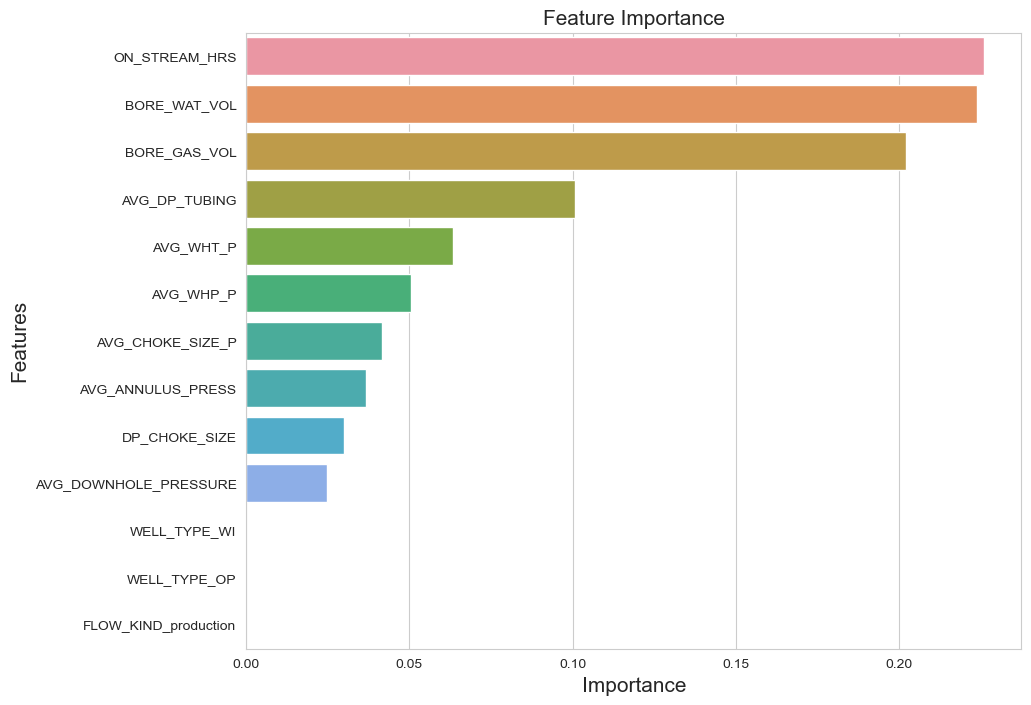

In [120]:
model = RandomForestRegressor(random_state = 10)

model.fit(X, y)

RFC_feature_importances = pd.DataFrame({'Features':X.columns, 'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

sns.barplot(x = 'Importance', y = 'Features', data = RFC_feature_importances)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [121]:
RFC_feature_importances['Features'][:6].values

array(['ON_STREAM_HRS', 'BORE_WAT_VOL', 'BORE_GAS_VOL', 'AVG_DP_TUBING',
       'AVG_WHT_P', 'AVG_WHP_P'], dtype=object)

In [122]:
df.shape

(8980, 14)

### RFE model

In [123]:
rf_rfe = RandomForestRegressor(random_state = 42)
rfe_model = RFE(estimator=rf_rfe, n_features_to_select = 6 )
rfe_model = rfe_model.fit(X_train, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['ON_STREAM_HRS', 'AVG_DP_TUBING', 'AVG_WHP_P', 'AVG_WHT_P',
       'BORE_GAS_VOL', 'BORE_WAT_VOL'],
      dtype='object')


In [124]:
gb_rfe = GradientBoostingRegressor(random_state = 42)
rfe_model = RFE(estimator=gb_rfe, n_features_to_select = 6 )
rfe_model = rfe_model.fit(X_train, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['ON_STREAM_HRS', 'AVG_CHOKE_SIZE_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE',
       'BORE_GAS_VOL', 'BORE_WAT_VOL'],
      dtype='object')


In [125]:
common_columns_list = ['ON_STREAM_HRS', 'AVG_DP_TUBING', 'AVG_WHP_P', 'AVG_WHT_P',
       'BORE_GAS_VOL', 'BORE_WAT_VOL']

print(common_columns_list)

['ON_STREAM_HRS', 'AVG_DP_TUBING', 'AVG_WHP_P', 'AVG_WHT_P', 'BORE_GAS_VOL', 'BORE_WAT_VOL']


In [126]:
# Now lets use these important columns to predict the bottomhole temperature.

In [127]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define the DataFrame for the scorecard
scorecard_regression = pd.DataFrame(columns=['Model', 'Train_RMSE', 'Test_RMSE', 'R-squared', 'Train_Accuracy', 'Test_Accuracy'])

def model_regression_imp_features(model_name, regressor, X_train, y_train, X_test, y_test):
    # Train the model
    model = regressor.fit(X_train, y_train)
    
    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate RMSE
    train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Calculate R-squared
    r2 = model.score(X_test, y_test)
    
    # Update the scorecard
    global scorecard_regression
    scorecard_regression = pd.concat([scorecard_regression, pd.DataFrame({'Model': [model_name],
                                                                          'Train_RMSE': [train_rmse],
                                                                          'Test_RMSE': [test_rmse],
                                                                          'R-squared': [r2],
                                                                          'Train_Accuracy': [model.score(X_train, y_train)],
                                                                          'Test_Accuracy': [model.score(X_test, y_test)]})], ignore_index=True)


In [128]:
X_train_best = X_train[common_columns_list]
X_test_best = X_test[common_columns_list]

In [129]:
#Linear Regression
model_regression_imp_features("Linear Regression", LinearRegression(), X_train_best, y_train, X_test_best, y_test)

# Ridge Regression
model_regression_imp_features("Ridge Regression", Ridge(), X_train_best, y_train, X_test_best, y_test)

# Lasso Regression
model_regression_imp_features("Lasso Regression", Lasso(), X_train_best, y_train, X_test_best, y_test)

# ElasticNet Regression
model_regression_imp_features("ElasticNet Regression", ElasticNet(), X_train_best, y_train, X_test_best, y_test)

# Decision Tree Regressor
model_regression_imp_features("Decision Tree Regressor", DecisionTreeRegressor(), X_train_best, y_train, X_test_best, y_test)

# Random Forest Regressor
model_regression_imp_features("Random Forest Regressor", RandomForestRegressor(), X_train_best, y_train, X_test_best, y_test)

# Gradient Boosting Regressor
model_regression_imp_features("Gradient Boosting Regressor", GradientBoostingRegressor(), X_train_best, y_train, X_test_best, y_test)

# Support Vector Regressor (SVR)
model_regression_imp_features("Support Vector Regressor", SVR(), X_train_best, y_train, X_test_best, y_test)

# K-Nearest Neighbors Regressor
model_regression_imp_features("K-Nearest Neighbors Regressor", KNeighborsRegressor(), X_train_best, y_train, X_test_best, y_test)


In [130]:
scorecard_regression['Train_RMSE'] = scorecard_regression['Train_RMSE'].apply(lambda x: round(x, 6))
scorecard_regression['Test_RMSE'] = scorecard_regression['Test_RMSE'].apply(lambda x: round(x, 6))

In [131]:
scorecard_regression

Model  Train_RMSE  Test_RMSE  R-squared  \
0              Linear Regression    1.606330   1.604374   0.492444   
1               Ridge Regression    1.606331   1.604404   0.492425   
2               Lasso Regression    2.214830   2.252297  -0.000285   
3          ElasticNet Regression    1.957684   1.985467   0.222684   
4        Decision Tree Regressor    0.000000   0.673375   0.910590   
5        Random Forest Regressor    0.190662   0.476778   0.955177   
6    Gradient Boosting Regressor    0.577502   0.626433   0.922621   
7       Support Vector Regressor    0.695014   0.711158   0.900275   
8  K-Nearest Neighbors Regressor    0.392656   0.475203   0.955472   

   Train_Accuracy  Test_Accuracy  
0        0.473996       0.492444  
1        0.473996       0.492425  
2        0.000000      -0.000285  
3        0.218724       0.222684  
4        1.000000       0.910590  
5        0.992590       0.955177  
6        0.932013       0.922621  
7        0.901530       0.900275  
8        0.968570       0.955472

In [132]:
# These are the models that I have built on the important features.

`Inference:`

- The results are still the same, overfitting has not been addressed properly.
- We shall move to the Hyperparameter tuning to analyze this.

In [133]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_best, y_train)

# Evaluate the model
train_score = rf_regressor.score(X_train_best, y_train)
test_score = rf_regressor.score(X_test_best, y_test)

# Make predictions
y_pred_train = rf_regressor.predict(X_train_best)
y_pred_test = rf_regressor.predict(X_test_best)

# Calculate additional evaluation metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print evaluation metrics
print('Train R^2 Score:', train_score)
print('Test R^2 Score:', test_score)
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train R^2 Score: 0.9928003974193275
Test R^2 Score: 0.9568746360051449
Train MSE: 0.035317456141945834
Test MSE: 0.2187057890571773


In [134]:
import plotly.express as px

# Fit the best model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = rf_regressor.predict(X_test)

# Create a DataFrame with actual and predicted values
df_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate the residuals
residuals = y_test - y_pred
df_model['Residuals'] = residuals

fig = px.scatter(df_model, x="Actual", y="Predicted", trendline="ols",
                title='Random Forest Regression Model Fit for the best features')
fig.show()

### Hyper Parameter Tuning

In [136]:
from sklearn.model_selection import GridSearchCV

param_grid_random_forest = {
    'n_estimators': [50, 100],  # Example values for number of trees in the forest
    'max_depth': [None, 2,5,7],  # Example values for max depth of the trees
    'min_samples_split': [2, 5, 6],  # Example values for min samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Example values for min samples required at each leaf node
}

grid_search_random_forest = GridSearchCV(RandomForestRegressor(), param_grid_random_forest, cv=5, scoring='neg_mean_squared_error')
grid_search_random_forest.fit(X_train, y_train)
print("Best parameters for Random Forest Regressor:", grid_search_random_forest.best_params_)

Best parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [137]:
rf_regressor = RandomForestRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Evaluate the model
train_score = rf_regressor.score(X_train, y_train)
test_score = rf_regressor.score(X_test, y_test)

# Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Calculate additional evaluation metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print evaluation metrics
print('Train R^2 Score:', train_score)
print('Test R^2 Score:', test_score)
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train R^2 Score: 0.9917336076377908
Test R^2 Score: 0.968387458805625
Train MSE: 0.040550564622577494
Test MSE: 0.1603197080688556


### Gradient Boost Regressor

In [138]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid_gradient_boosting = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 1.0]
}

grid_search_gradient_boosting = GridSearchCV(GradientBoostingRegressor(), param_grid_gradient_boosting, cv=5, scoring='neg_mean_squared_error')
grid_search_gradient_boosting.fit(X_train, y_train)
print("Best parameters for Gradient Boosting Regressor:", grid_search_gradient_boosting.best_params_)

Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}


In [139]:
gb_regressor = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=4,
    n_estimators=100,
    subsample=1.0,
    random_state=42  # It's good practice to set a random state for reproducibility
)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Evaluate the model's performance
train_score = gb_regressor.score(X_train, y_train)
test_score = gb_regressor.score(X_test, y_test)

# Make predictions on the training and test sets
y_pred_train = gb_regressor.predict(X_train)
y_pred_test = gb_regressor.predict(X_test)

# Calculate the R^2 and Mean Squared Error (MSE) for both sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print out the evaluation metrics
print('Train R^2 Score:', train_score)
print('Test R^2 Score:', test_score)
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train R^2 Score: 0.989030147279184
Test R^2 Score: 0.9598177300266872
Train MSE: 0.05381231644522683
Test MSE: 0.2037801944505401


### Support Vector Regressor (SVR)

In [140]:
from sklearn.svm import SVR

param_grid_svr = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, y_train)
print("Best parameters for SVR:", grid_search_svr.best_params_)

Best parameters for SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [141]:
svr_regressor = SVR(C=10, gamma='scale', kernel='rbf')

# Fit the model to the training data
svr_regressor.fit(X_train, y_train)

# Evaluate the model's performance
train_score = svr_regressor.score(X_train, y_train)
test_score = svr_regressor.score(X_test, y_test)

# Make predictions on the training and test sets
y_pred_train = svr_regressor.predict(X_train)
y_pred_test = svr_regressor.predict(X_test)

# Calculate the R^2 and Mean Squared Error (MSE) for both sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print out the evaluation metrics
print('Train R^2 Score:', train_score)
print('Test R^2 Score:', test_score)
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train R^2 Score: 0.9609207024368425
Test R^2 Score: 0.9495374798733782
Train MSE: 0.19170243944436358
Test MSE: 0.25591541171509113


`Inference:`
    
- Out of the models that we have built in the scorecard, we have applied hyperparameter tuning only on the three models. 
- RF, GB, SVR these three models.
- Out of these three models, SVR has performed well. 
- Very less MSE scores and also the accuracies are good. Only little overfitting.
- We can choose this as our best model.
- Now lets decide between the KNN Regressor and the tuned SVR as our best model.

In [142]:
import plotly.express as px

# Fit the best model on the training data
svr_regressor.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = svr_regressor.predict(X_test)

# Create a DataFrame with actual and predicted values
df_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate the residuals
residuals = y_test - y_pred
df_model['Residuals'] = residuals

fig = px.scatter(df_model, x="Actual", y="Predicted", trendline="ols",
                title='Random Forest Tuned SVR Model Fit')
fig.show()

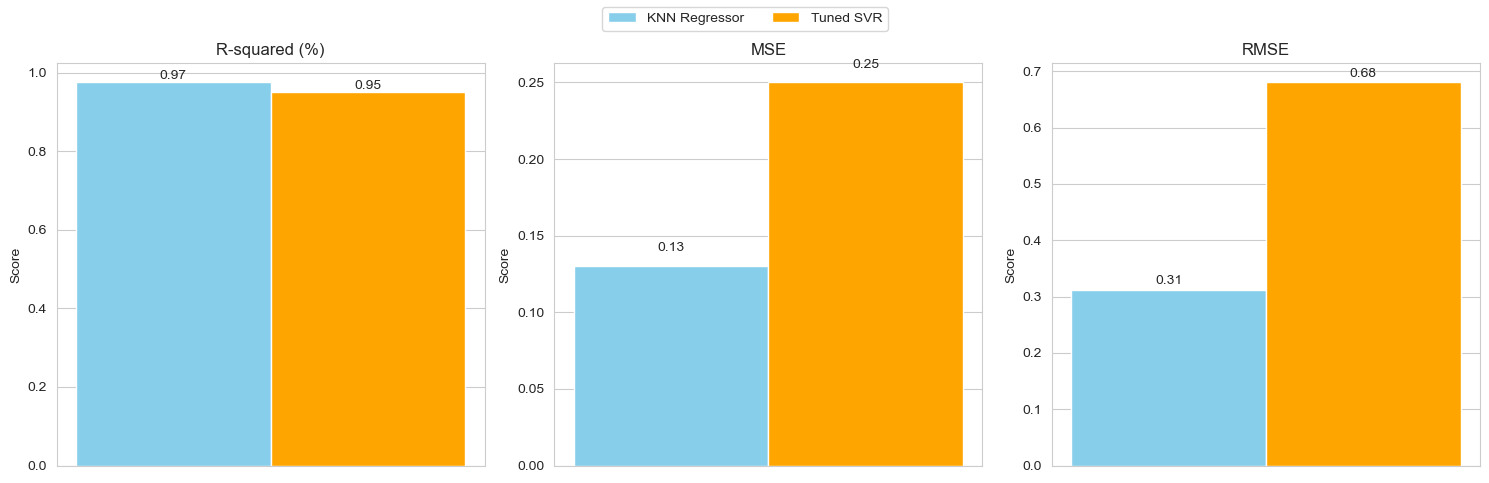

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Scores for KNN Regressor and SVR
knn_scores = [0.975, 0.13, 0.312]  # R2, MSE, RMSE for KNN
svr_scores = [0.95, 0.25, 0.68]    # R2, MSE, RMSE for SVR

# Set the positions and width for the bars
bar_width = 0.35

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Titles for subplots
titles = ['R-squared (%)', 'MSE', 'RMSE']

# Colors for the bars
colors = ['skyblue', 'orange']

# Plotting the bars for each metric
for i, ax in enumerate(axs):
    ax.bar(0, knn_scores[i], bar_width, label='KNN Regressor', color=colors[0])
    ax.bar(bar_width, svr_scores[i], bar_width, label='SVR', color=colors[1])
    ax.set_title(titles[i])
    ax.set_ylabel('Score')
    # Adding the metric value above each bar
    ax.text(0, knn_scores[i] + max(knn_scores) * 0.01, f"{knn_scores[i]:.2f}", ha='center')
    ax.text(bar_width, svr_scores[i] + max(svr_scores) * 0.01, f"{svr_scores[i]:.2f}", ha='center')

# Setting the x-ticks to be empty as we have only two bars in each subplot
for ax in axs:
    ax.set_xticks([])

# Adding the legend
fig.legend(['KNN Regressor', 'Tuned SVR'], loc='upper center', ncol=2)

# Adjust layout to fit the screen
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

### From the above plot, we can say the clear winner is KNN Regressor.

- The MSE and RMSE values are high for SVR than KNN although the R2 value is almost same, so lets consider KNN regressor as our final model for our dataset.

### Conclusion

- Based on the analysis, we utilized various input features to predict Bottom Hole Temperature (BHT). Among these features, 'AVG_DOWNHOLE_PRESSURE' and 'AVG_DP_TUBING' emerged as significant predictors, indicating their strong influence on BHT. Our predictive model demonstrated satisfactory performance, suggesting its potential utility in forecasting BHT in similar contexts. These findings underscore the importance of monitoring downhole pressure conditions for effective temperature prediction, offering valuable insights for optimizing operational strategies in oil and gas production.

- The conclusion highlights the successful application of data analysis on the Volve field dataset, where through careful data handling and visualization, key feature relationships were uncovered. Despite challenges such as missing data, strategic imputation improved the dataset's quality, leading to a robust machine-learning model capable of predicting well performance and optimizing operations. It emphasizes that while current findings are substantial, continuous exploration with advanced analytics could yield deeper insights. This case exemplifies the transformative impact of data-driven methodologies in enhancing efficiency and sustainability within the oil and gas sector.